# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

Thera Bank has recently experienced a significant drop in the number of credit card users. Credit cards are a major revenue source for banks, generating income through various fees such as annual fees, balance transfer fees, cash advance fees, late payment fees, and foreign transaction fees. Some of these fees apply to all users, while others are incurred under specific conditions.

The loss of credit card customers is concerning for the bank, as it directly impacts their revenue. To address this issue, Thera Bank wants to analyze customer data to identify patterns and reasons why customers are leaving their credit card services. By understanding these reasons, the bank aims to improve its services and retain more customers.

The task is to develop a classification model that can predict which customers are likely to leave and identify the factors driving their decision. This model will help the bank enhance its services and reduce customer attrition.

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### Some defintions
##### Revolving Balance:

- If a customer doesn't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month is called a revolving balance.

##### Average Open to buy:

- Open to Buy is the amount left on credit card to use. In this dataset 'Open to Buy' column represents the average of this value for the last 12 months.

##### Average utilization Ratio:

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.

##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [82]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To calculate statistical measures
from scipy import stats
from scipy.stats import chi2_contingency

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


In [83]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [84]:
# Set the file path
file_path = '/content/drive/MyDrive/MLProject_3/'
datafile = 'BankChurners.csv'

In [85]:
# Load datafile
data = pd.read_csv(file_path+ datafile)

In [86]:
df=data.copy()

In [87]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


## Data Overview

In [88]:
# Get the data types
data_types = df.dtypes

# Get column names
columns = df.columns.tolist()

# Calculate the number of missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
percent_missing = round(df.isna().sum() / df.isna().count() * 100, 2)

# Get the count of unique values
unique_values = df.nunique()

# Combine all information into a single Table
summary_df = pd.DataFrame({
    "Columns": columns,
    "Datatype": data_types.values,
    "Missing": missing_values.values,
    "% Missing": percent_missing.values,
    "Unique": unique_values.values
})

# Display the summary DataFrame
print("_" * 50, "\nData Coulumns Summary:\n")
print(summary_df)


__________________________________________________ 
Data Coulumns Summary:

                     Columns Datatype  Missing  % Missing  Unique
0                  CLIENTNUM    int64        0      0.000   10127
1             Attrition_Flag   object        0      0.000       2
2               Customer_Age    int64        0      0.000      45
3                     Gender   object        0      0.000       2
4            Dependent_count    int64        0      0.000       6
5            Education_Level   object     1519     15.000       6
6             Marital_Status   object      749      7.400       3
7            Income_Category   object        0      0.000       6
8              Card_Category   object        0      0.000       4
9             Months_on_book    int64        0      0.000      44
10  Total_Relationship_Count    int64        0      0.000       6
11    Months_Inactive_12_mon    int64        0      0.000       7
12     Contacts_Count_12_mon    int64        0      0.000       7


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [90]:
df.duplicated().sum()

0

### Observations (Data Overview)
 - There are 10127 rows and 21 columns in the dataset
 - There are six categorical variables including Attrition_Flag, Gender,  Education_Level, Marital_Status, Income_Category and Card_Category and the rest of them are numeric.
 - the average customer age is 46, with a minimum age of 26 and maximum age of 73
 - the average number of dependants is 2, maximum is 5
 - the average of months on the book is about 36 months ranging 13 to 56 months.
 - The average of total relationship count is more than 3 that means the customers are using atleast 3 bank products on average.
 - Average of credit limit is 8600 which ranges from 1400 to 34500.
 - Average of revolving balance is 1162 ranging from 0 to 2500.
 - Available buying power ranges from almost 0 to the maximum of the credit limit with an average of at least 7400.
 - Average utilization ratio is 27% ranging from 0% to 100%.


- Sanity checks
  - There are 1519 missing values in the column of Education_Level and 749 missing values in Marital_Status
  - No negative values at all in the dataset.
  - No duplicate records in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, will be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [91]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [92]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [93]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts, plot a stacked bar chart, and perform a chi-square test.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Perform chi-square test of independence
    contingency_table = pd.crosstab(data[predictor], data[target])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Define significance level
    alpha = 0.05

    # Determine the hypothesis based on p-value
    if p_value < alpha:
        significance = "reject"
        statement = f"There is a significant association between {predictor} and {target} with p-value {p_value:.3f} < 0.05. \n We reject the null hypothesis."
    else:
        significance = "accept"
        statement = f"There is no significant association between {predictor} and {target} with p-value {p_value:.3f} > 0.05. \n We fail to reject the null hypothesis."

    # Add the statement at the bottom of the plot
    plt.figtext(0.5, -0.1, statement, ha='center', fontsize=10, bbox={"facecolor":"none", "alpha":0.5, "pad":5, "edgecolor": "none"})
    plt.tight_layout()
    plt.show()

In [94]:
def distribution_plot_wrt_target(data, predictor, target):

    """
    Plots the distribution and relationship between a predictor and target variable.

    Parameters:
    - data: Dataset containing the predictor and target
    - predictor: Independent variable
    - target: target variable

    Calculates and displays the Pearson correlation coefficient and significance.
    """

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_title("Distribution of target=" + str(target_uniq[0]))

    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target=" + str(target_uniq[1]))

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot w.r.t target")

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")

    # Calculate Pearson correlation coefficient and p-value
    corr, p_value = stats.pearsonr(data[predictor], data[target])

    # Define significance level
    alpha = 0.05

    # Determine the hypothesis based on p-value
    if p_value < alpha:
        significance = "reject"
        statement = f"There is a significant difference between {predictor} and {target} with a correlation coefficient of {corr:.2f}, and p-value < 0.05. \n We reject the null hypothesis."
    else:
        significance = "accept"
        statement = f"There is no significant difference between {predictor} and {target} with a correlation coefficient of {corr:.2f}, and p-value > 0.05. \n We fail to reject the null hypothesis."

    # Print the statement at the bottom of the plot
    fig.text(0.1, -0.1, statement, ha='left')

    plt.tight_layout()
    plt.show()

## Data Pre-processing

## Univariate analysis

### Observation on Numerical variables

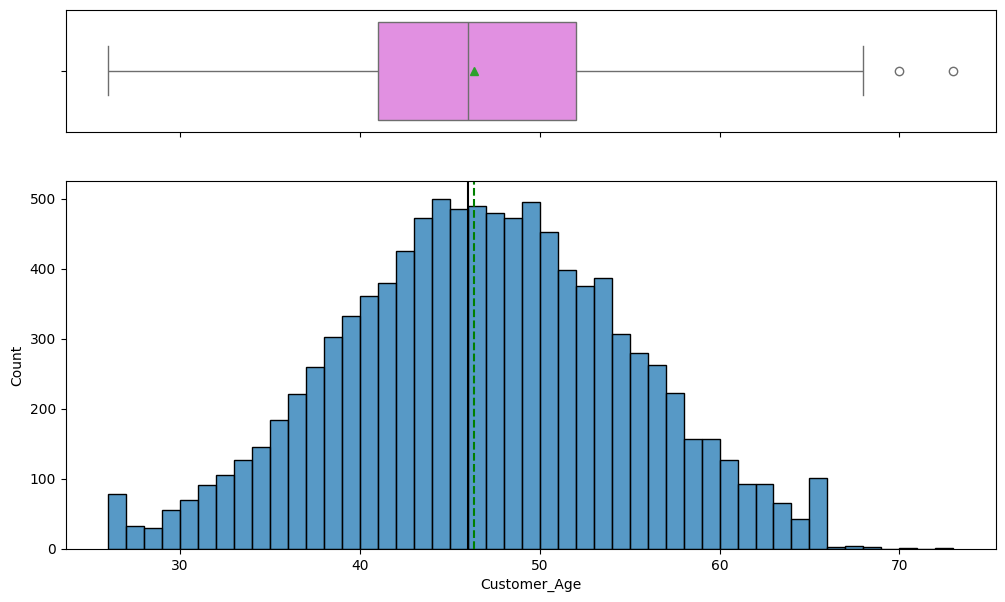

In [95]:
# Observations on Customer_age
histogram_boxplot(df, "Customer_Age")

The customer's age seems to be distributed normally with an average of around 46. There are few outliers at the right end but we are not treating them as they represent the reality of the market and they are only few in numbers.

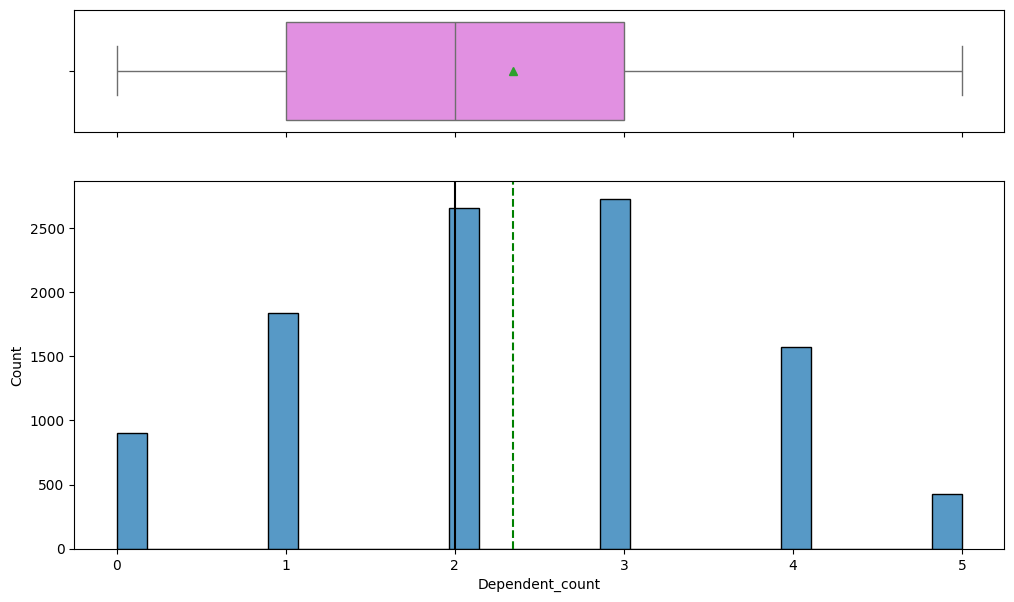

In [96]:
# Observations on Dependent_count
histogram_boxplot(df, "Dependent_count")

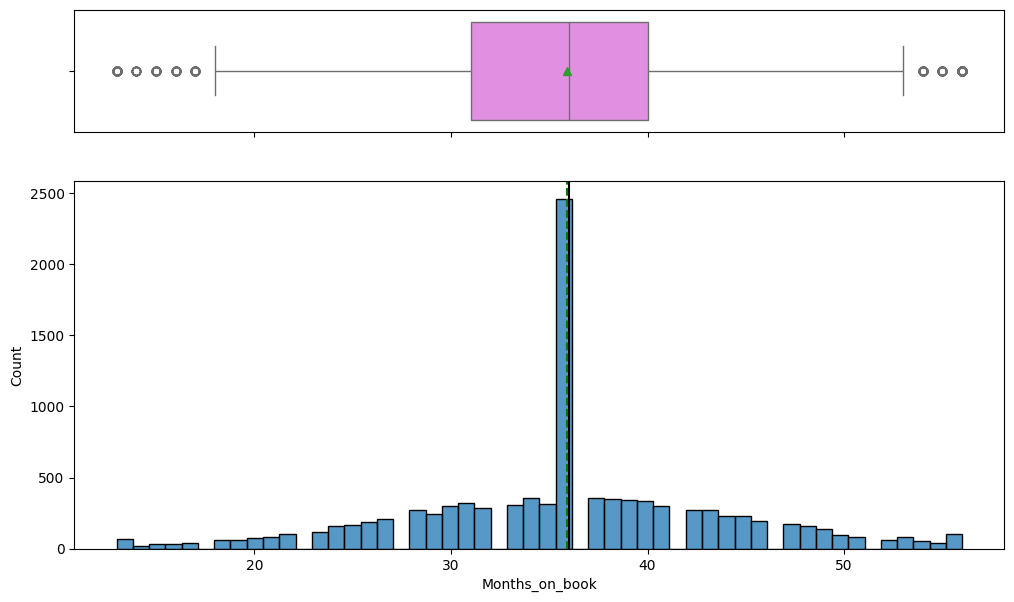

In [97]:
# Observations on Months_on_book
histogram_boxplot(df, "Months_on_book")

The distribution of months on book shows a high spike on plot around 35 with some outliers on both the ends which seems obvious and no need to treat as well.

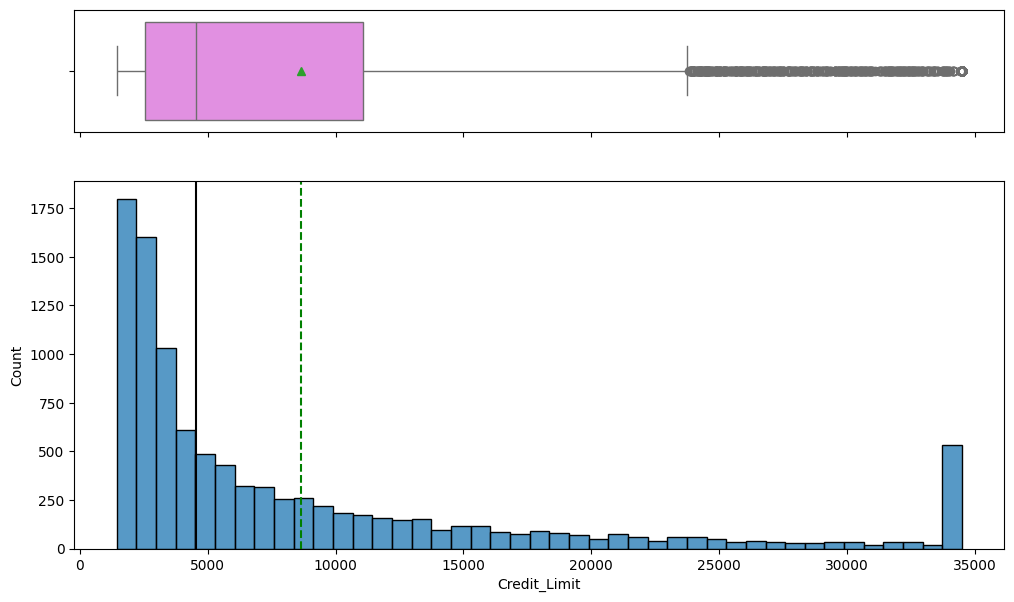

In [98]:
# Observations on Credit_Limit
histogram_boxplot(df, "Credit_Limit")

- The distribution of credit limit is right-skewed with outliers at the right end
- We will see further if these outliers need to be treated

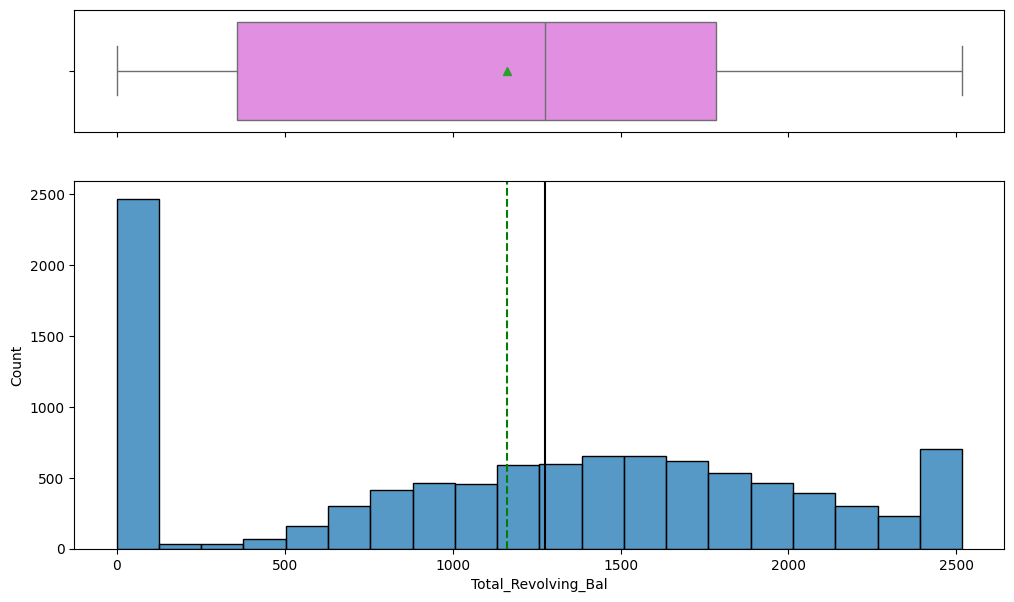

In [99]:
# Observations on Total_Revolving_Bal
histogram_boxplot(df, "Total_Revolving_Bal")

- The distribution of total revolving balance shows about one forths of the customers revolving balance lies below 125. About 750 customers revolving balances lies towards the higher end. The boxplot shows no outliers.


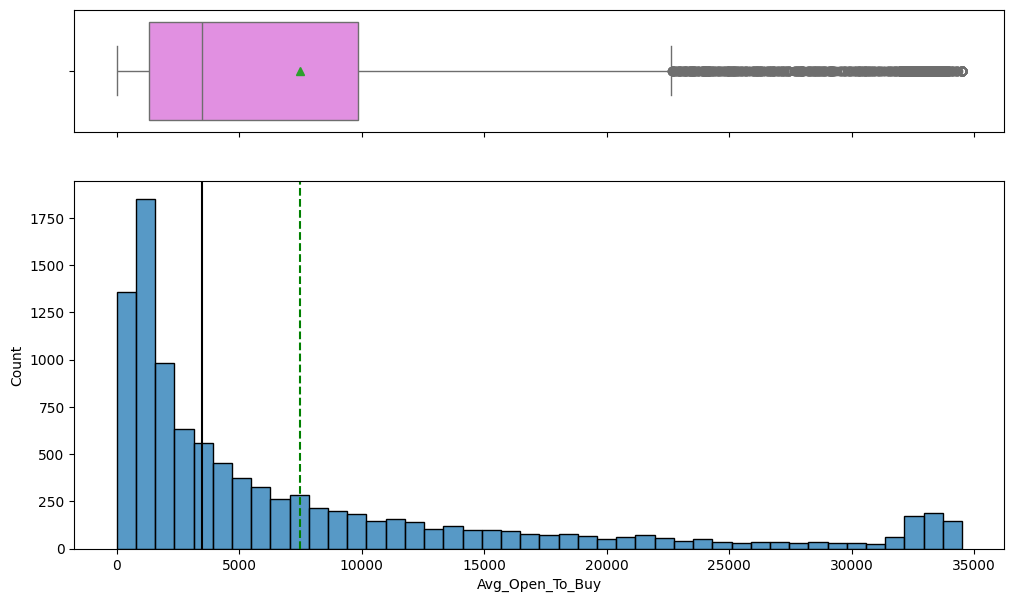

In [100]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(df, "Avg_Open_To_Buy")

- The distribution of avg open to buy is highly right-skewed
- The boxplot shows that there are lot of outliers at the right end
- We will see if these outliers need to be treated.

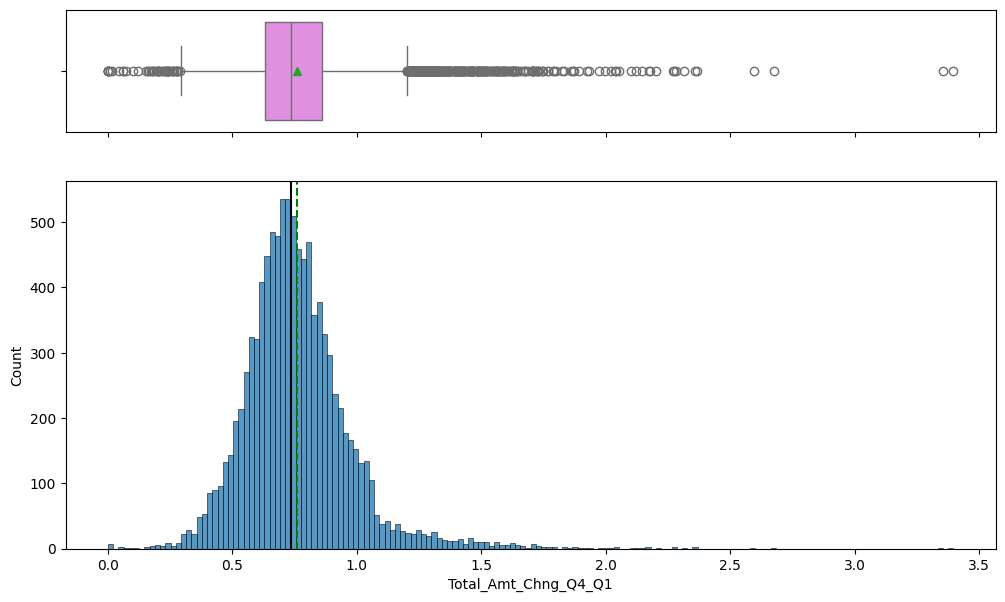

In [101]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

- The distribution of total amount change Q4-Q1 seems normal.
- There are outliers at both the ends.
- We will see if these outliers need to be treated.

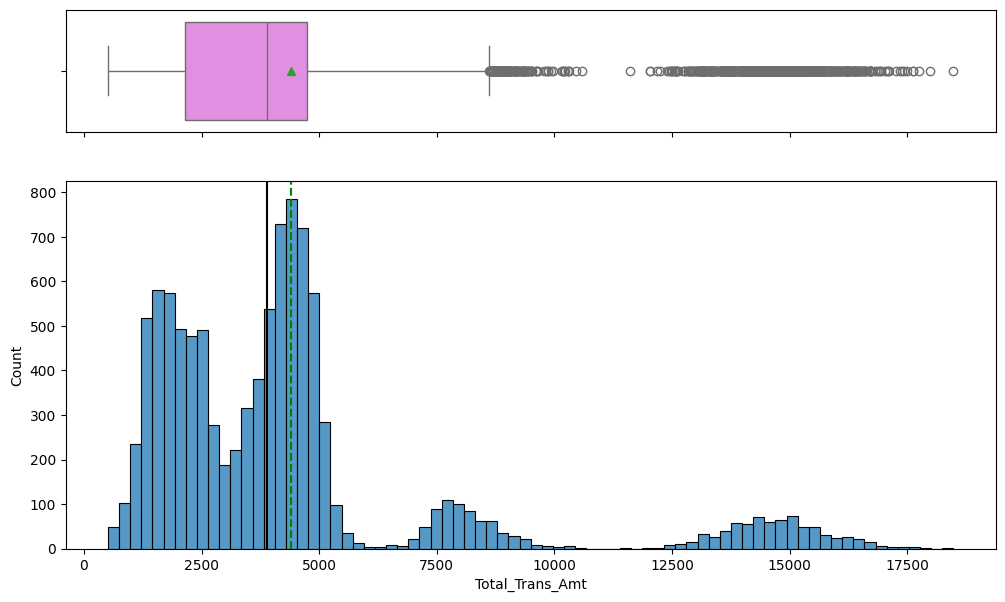

In [102]:
# Observations on Total_Trans_Amt
histogram_boxplot(df, "Total_Trans_Amt")

- The distribution of total trans amount seems multimodal in nature with outliers at the right end.
- We will see if these outliers need to be treated.

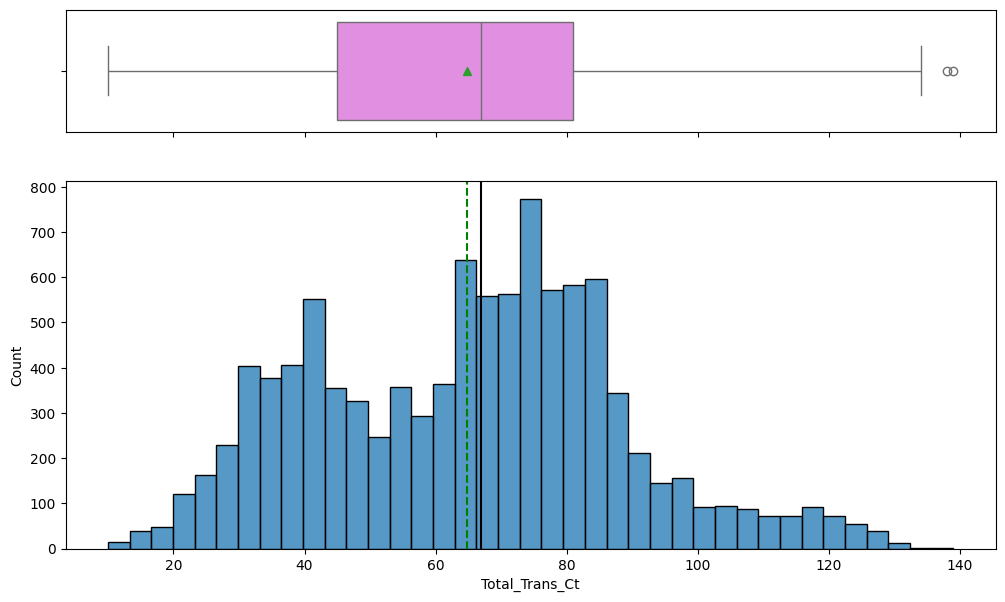

In [103]:
# Observations on Total_Trans_Ct
histogram_boxplot(df, "Total_Trans_Ct")

- The distribution of total trans count shows kind of normal with few outliers at the right end but these seems to be more realistic in nature and hence no need to be treated.

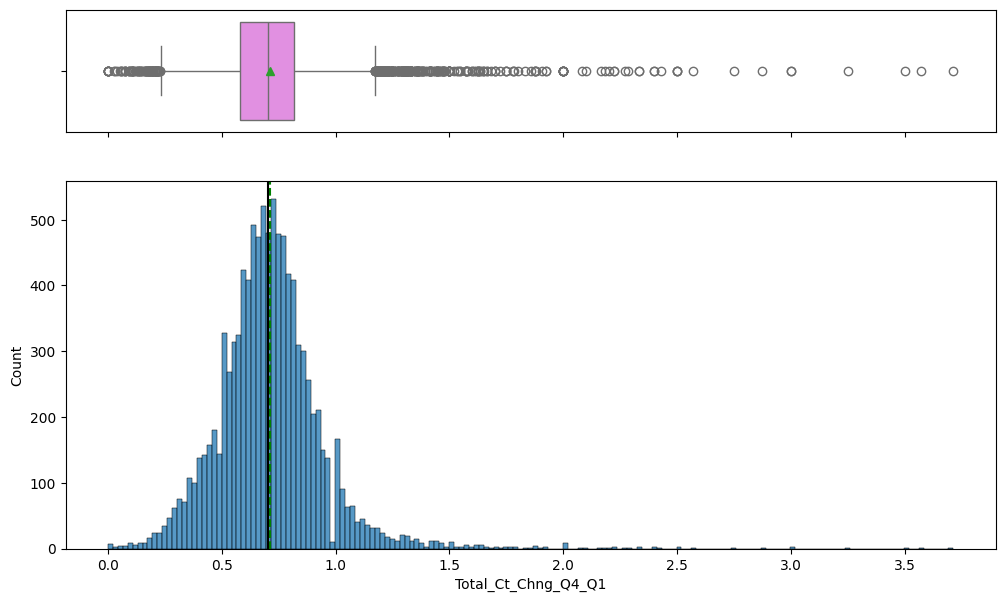

In [104]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

- The total count change Q4_Q1 is noramlly distributed with some outlies on both the ends.
- We will see if these outliers to be treated.

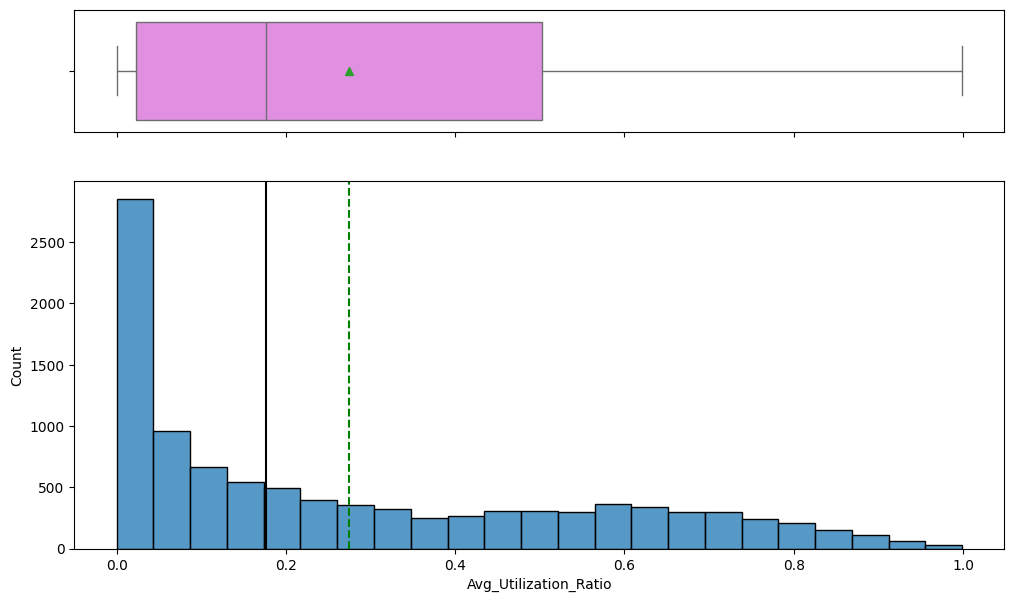

In [105]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(df, "Avg_Utilization_Ratio")

- The distribution of averege utilization ratio is right-skewed with no outlies.

### Observation on Non Numerical variables

In [106]:
# Create a list of categorical columns
categorical_cols = ["Attrition_Flag", "Gender", 'Dependent_count', "Education_Level", "Marital_Status", "Income_Category",
                    "Card_Category", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon"]


df[categorical_cols] = df[categorical_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              10127 non-null  floa

In [107]:
df.describe(include=['category']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Dependent_count,10127,6,3,2732
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436
Total_Relationship_Count,10127,6,3,2305
Months_Inactive_12_mon,10127,7,3,3846
Contacts_Count_12_mon,10127,7,3,3380


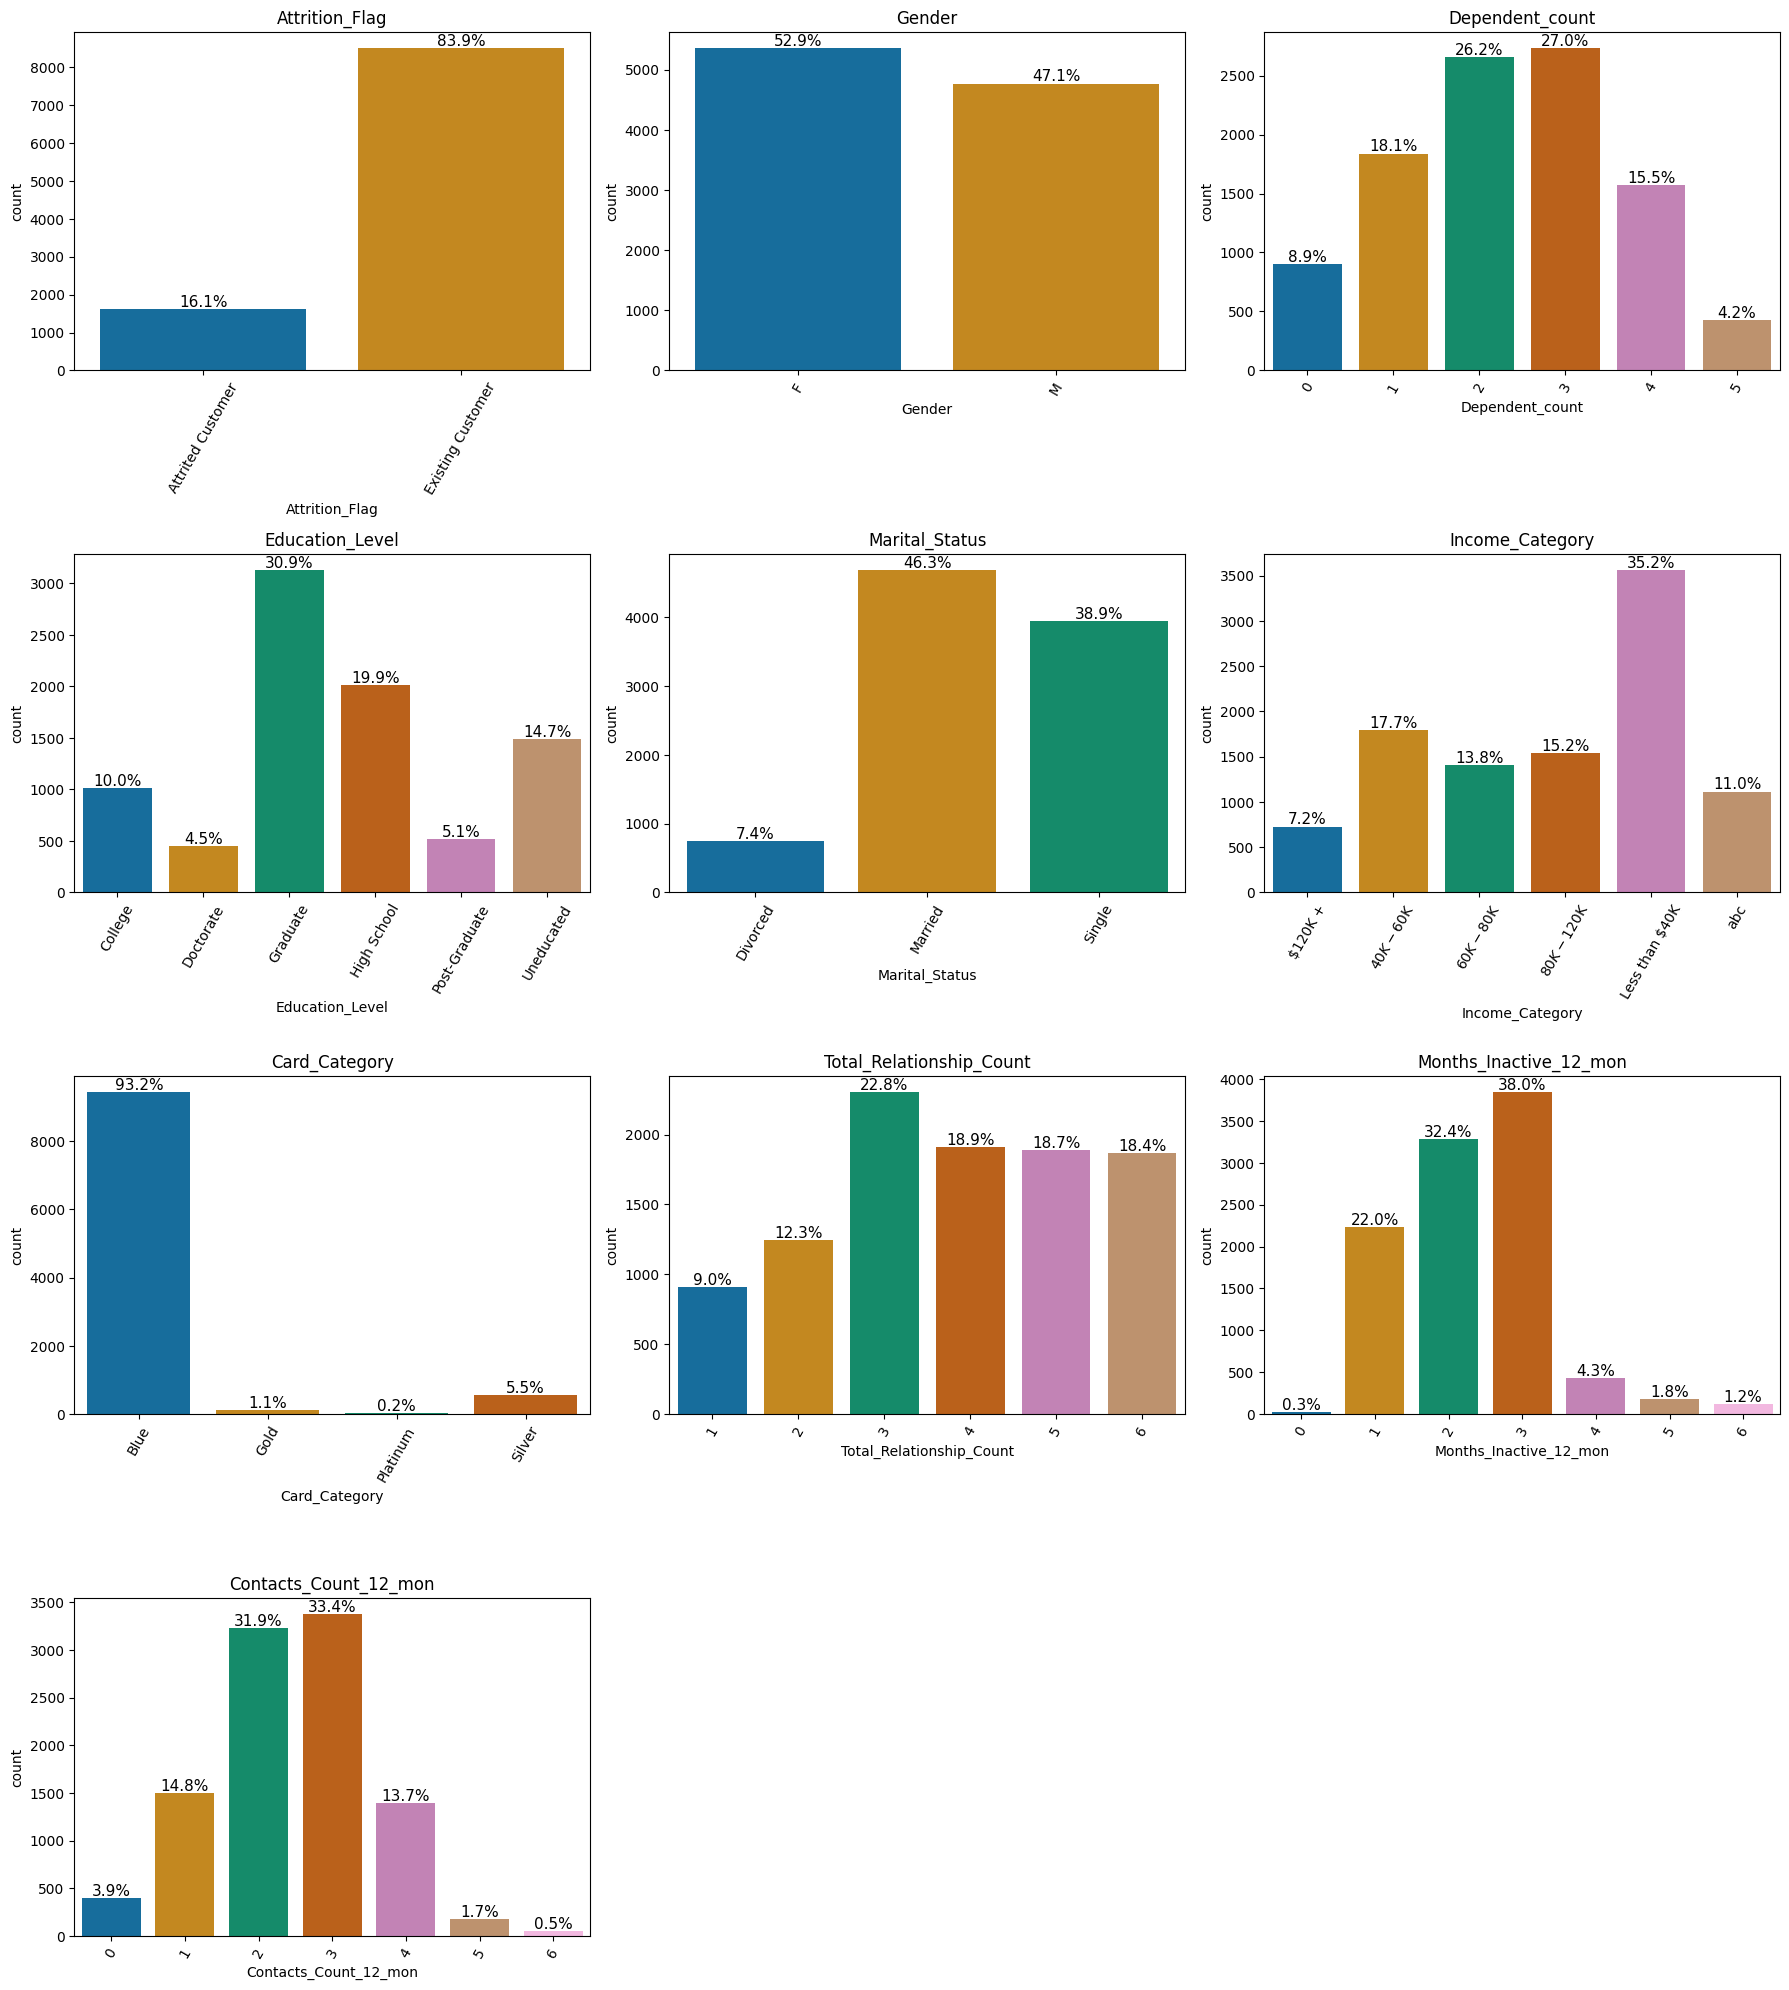

In [108]:
# Define a function to get a color palette based on the number of unique values
def get_palette(n, palette_name):
    return sns.color_palette(palette_name, n)

plt.figure(figsize=(18, 30))

# Countplot visualization for categorical variables
for i, variable in enumerate(categorical_cols):
    plt.subplot(6, 3, i+1)

    # Get a palette based on the number of unique values in the column
    palette = get_palette(len(df[variable].unique()), "colorblind")

    # Create a countplot with a specific palette
    ax = sns.countplot(data=df, x=variable, palette=palette)

    # Set x-axis tick positions and rotate labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

    # Calculate percentages and annotate bars
    total = len(df[variable])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{(height / total * 100):.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title(variable)

plt.tight_layout()
plt.show()


#### Observations:
- The class distribution in the target variable is imbalanced. Around 84% are existing customers and 16% are attrited customers.
- About 53% of the customers are female and 47% are male.
- About 40% of the customer's Education Level is Graduate and higher. 14.7% are uneducated.
- 46.3% of the customers are married followed by 39% single and very few are divorsed.
- Above 35% of the customers income level is less than 40K. The category 'abc' will be treated later as 'unknown' for further analysis.
- Majority of the customers (above 93%)  are in the category of Blue card.
- Around 21% of the customers have less than three bank products, indicating a good proportion of customers utilize multiple banking services (3 or more).
- Approximately 7% of the customers have been inactive for more than three months. It would be worthy to deep dive further to identify any potential relationship with attrition among these customers.
- Around 65% of the customers were contacted 2-3 times within a 12-month period, indicating a common frequency of communication with the credit card company.

## Bivariate analysis

### Observation on bivariate

In [109]:
# sns.pairplot(df, hue="Attrition_Flag", corner=True);

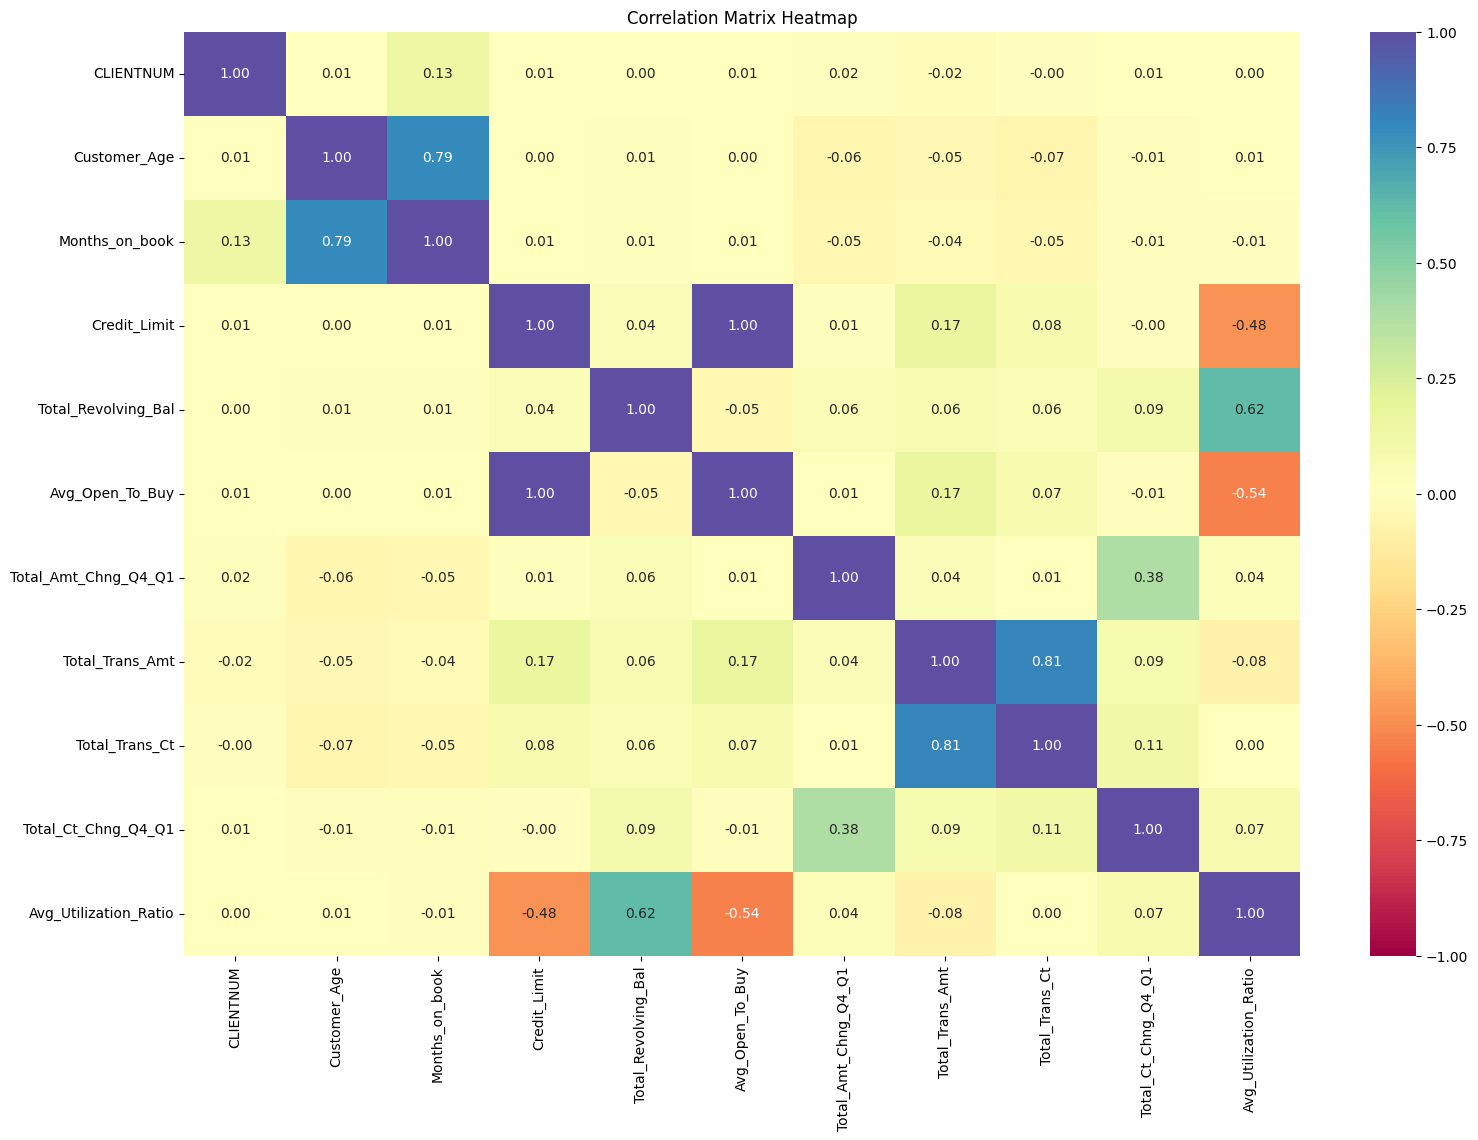

In [110]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Correlation Matrix Heatmap')
plt.show()

 #### Observations:
 The following observations are noted from the above pair plots and correlation table.

 - The credit limit and average open to buy are perfectly correlated. Consider dropping one of them to avoid redundancy.

 - The age of the customer and the number of months on book are strongly correlated, indicating a potential relationship between age and period of relationship with the bank.

 - The credit limit and average utilization ratio exhibit a negative correlation, suggesting that as the credit limit increases, the average utilization ratio tends to decrease.

 - There is a positive correlation between the total revolving balance and average utilization, indicating that customers with higher average utilization tend to have higher total revolving balances.

 - The average opening balance is negatively correlated with the average utilization ratio, implying that as the average opening balance increases, the average utilization ratio tends to decrease.

 - There is very little correlation between the total transfer amount and the credit limit, suggesting that the credit limit does not significantly impact the total transfer amount.

 - As expected, there is a high correlation between the total transfer amount and the total transfer count, indicating that customers with more transfer transactions tend to have higher total transfer amounts.

 - It is logical that the total transaction amount is correlated with the total amount change and the total count change, as these features may be derived from the total transaction amount. Consider dropping one of these columns to avoid duplication.


### Exporing the relationship of target variable with other features:

In [111]:
# Label Encoding for the target variables
attrition = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag']=df['Attrition_Flag'].map(attrition)


Attrition_Flag     1     0    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


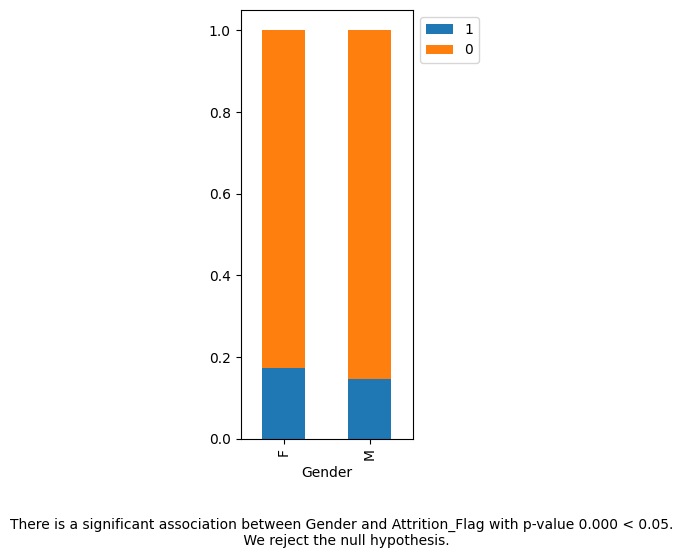

In [112]:
stacked_barplot(df, "Gender", "Attrition_Flag")


| Attrition_Flag | 1    | 0    | All   |
|----------------|------|------|-------|
| Gender         |      |      |       |
| All            | 1627 | 8500 | 10127 |
| F              | 930  | 4428 | 5358  |
| M              | 697  | 4072 | 4769  |


More female customers are likely to attrite compared to the male customers. There is a significant difference between Gender and Attrition.

Attrition_Flag      1     0    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------------------------------------------------------------------------------------------------


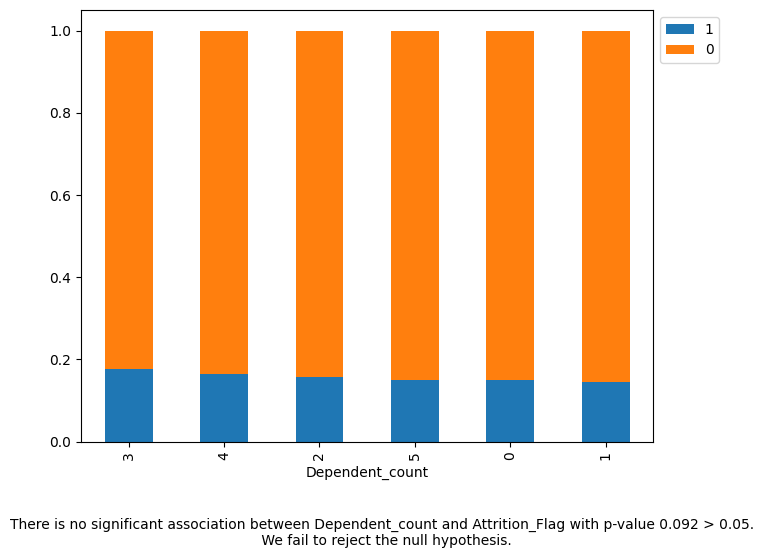

In [113]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

| Dependent_count | Attrition_Flag 0 | Attrition_Flag 1 | All   |
|-----------------|------------------|------------------|-------|
| All             | 8500             | 1627             | 10127 |
| 3               | 2250             | **482**              | 2732  |
| 2               | 2238             | **417**              | 2655  |
| 1               | 1569             | 269              | 1838  |
| 4               | 1314             | 260              | 1574  |
| 0               | 769              | 135              | 904   |
| 5               | 360              | 64               | 424   |
|-----------------|------------------|------------------|-------|

- From the above table, we observe that the number of attrited customers is concentrated among those with 2 to 3 dependents. Statistically, there is no significant difference between the number of dependents and attrition as we fail to reject the null hypothesis at 0.05 level of significance.

Attrition_Flag               1     0    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


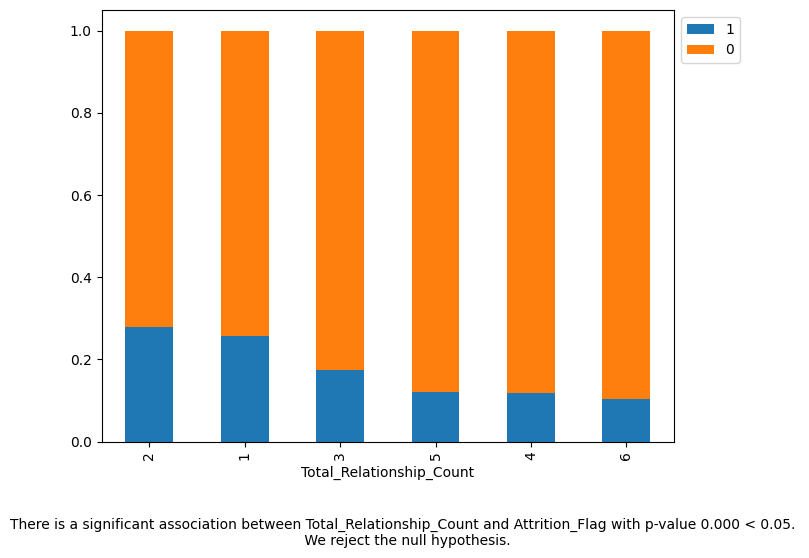

In [114]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

| Total_Relationship_Count | Attrition_Flag 0 | Attrition_Flag 1 | All   |
|--------------------------|------------------|------------------|-------|
| All                      | 8500             | 1627             | 10127 |
| 3                        | 1905             | 400              | 2305  |
| 2                        | 897              | 346              | 1243  |
| 1                        | 677              | 233              | 910   |
| 5                        | 1664             | 227              | 1891  |
| 4                        | 1687             | 225              | 1912  |
| 6                        | 1670             | 196              | 1866  |


Overall, it appears that customers who have attrited are less likely to have multiple bank products. When examining individual groups within the target variable (attrition flag), the test shows a significant difference between the number of relationships and attrition.

Attrition_Flag             1     0    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


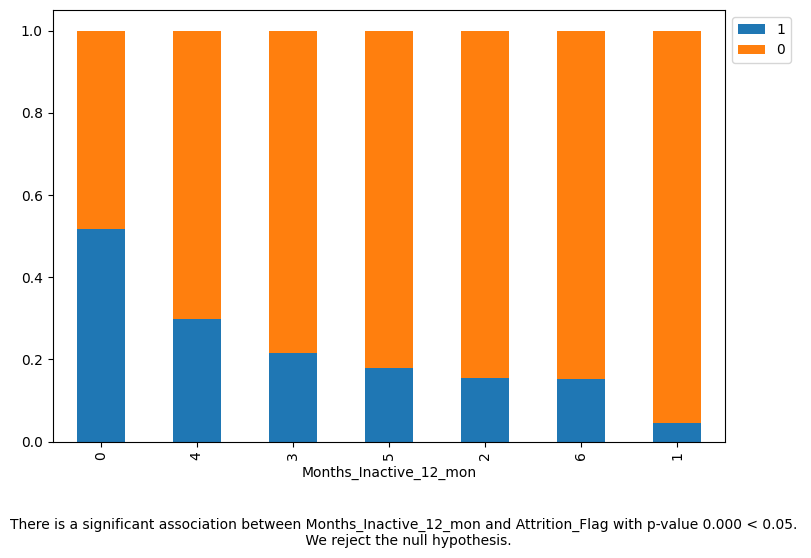

In [115]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Number of months a customer was inactive within the last 12 months:

| Months_Inactive_12_mon | Attrition_Flag 0 | Attrition_Flag 1 | All  |
|------------------------|------------------|------------------|------|
| All                    | 8500             | 1627             | 10127|
| 3                      | 3020             | 826              | 3846 |
| 2                      | 2777             | 505              | 3282 |
| 4                      | 305              | 130              | 435  |
| 1                      | 2133             | 100              | 2233 |
| 5                      | 146              | 32               | 178  |
| 6                      | 105              | 19               | 124  |
| 0                      | 14               | 15               | 29   |

Among the overall customers, there is a significant association between the number of inactive months and customer attrition.  

Attrition_Flag            1     0    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------------------------------------------------------------------------------------------------


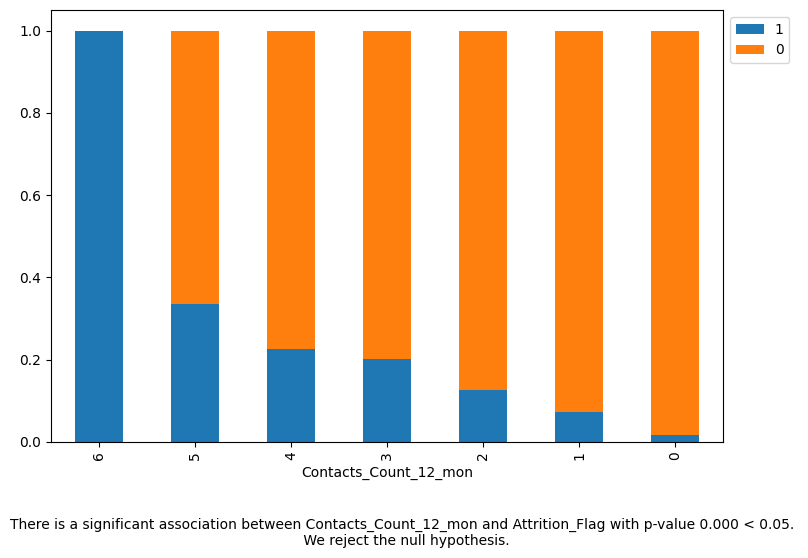

In [116]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")



| Contacts_Count_12_mon|Attrition_Flag 0 |Attrition_Flag 1 |    All |
|---------------------|-------|-------|--------|
| All                 |  8500 |  1627 |  10127 |
| 3                   |  2699 |   681 |   3380 |
| 2                   |  2824 |   403 |   3227 |
| 4                   |  1077 |   315 |   1392 |
| 1                   |  1391 |   108 |   1499 |
| 5                   |   117 |    59 |    176 |
| 6                   |     0 |    54 |     54 |
| 0                   |   392 |     7 |    399 |

Similar to the variable months inactive in the past 12 months, the total contacts within 12 months also has statistically significant difference.

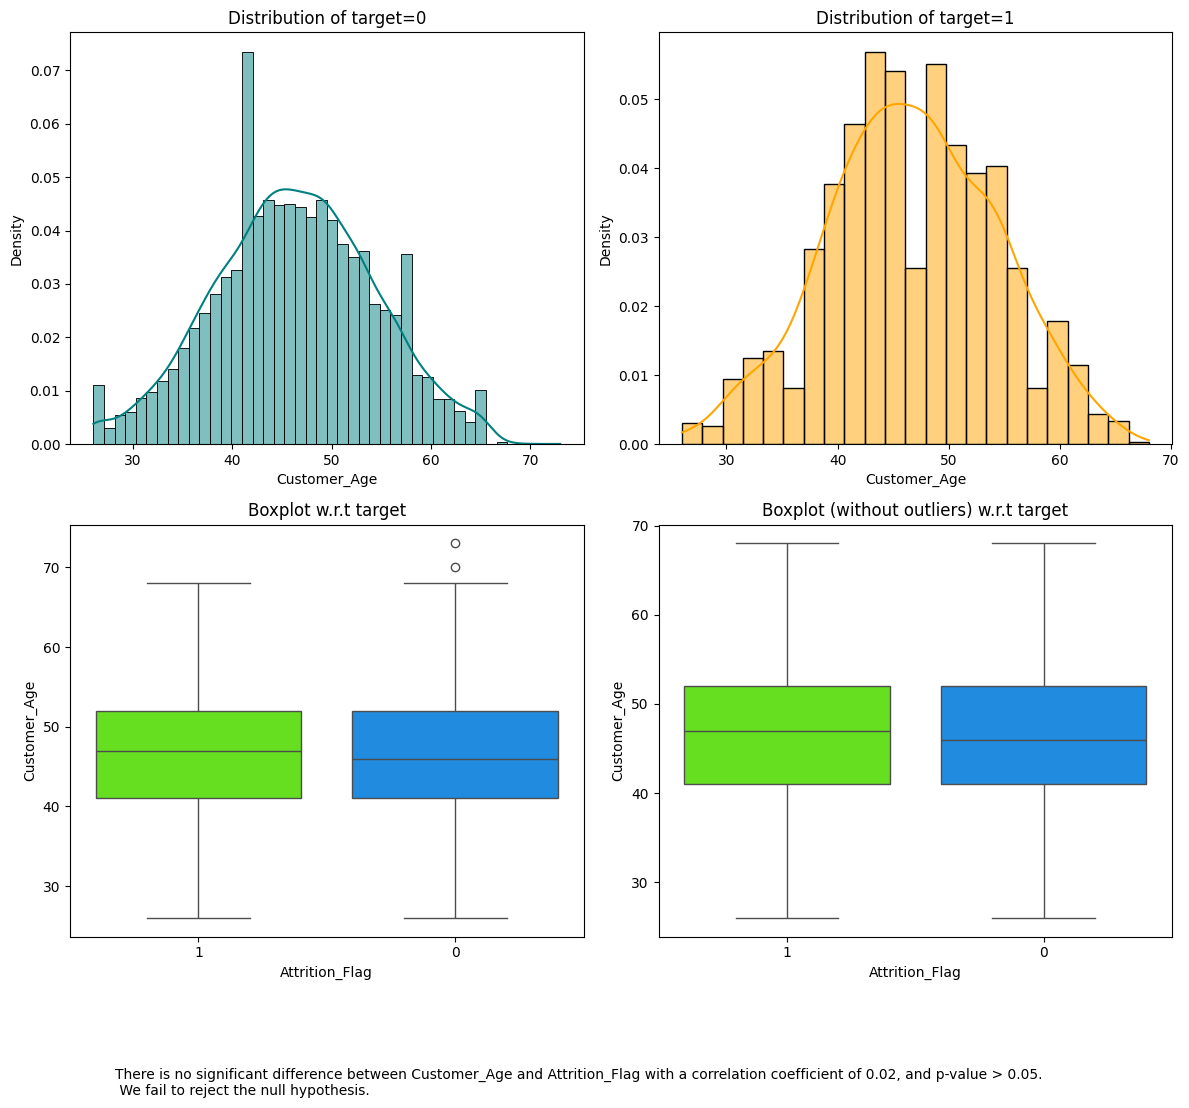

In [117]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

There is no significant difference between the customer's age and Attrition.

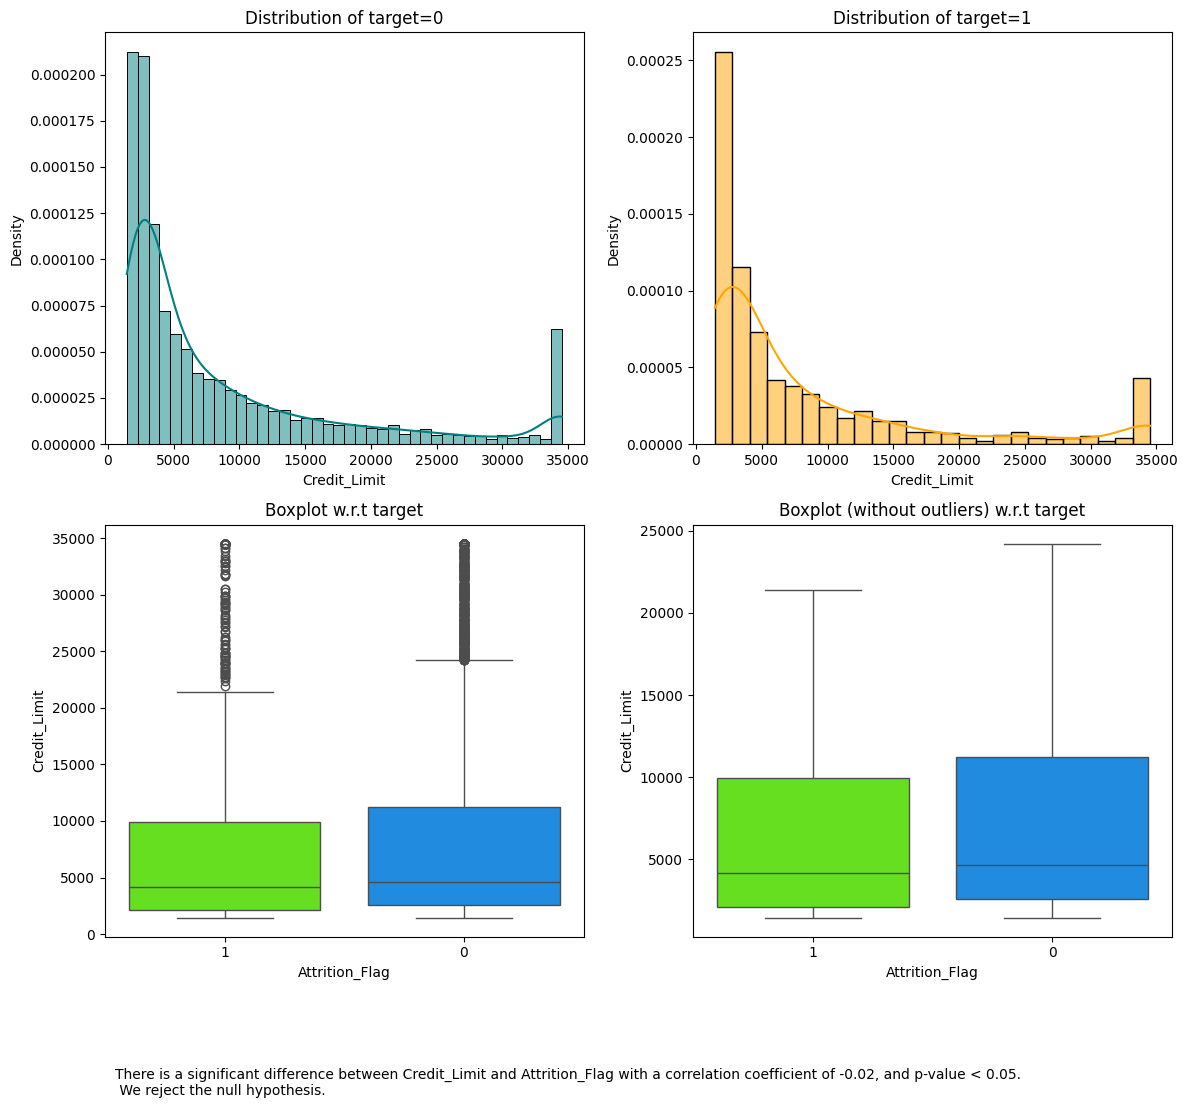

In [118]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

- The median credit limit of the attrited customers are less than existing customers.
- The analysis shows there is a significant difference between the Credit Card Limit and Attrition.

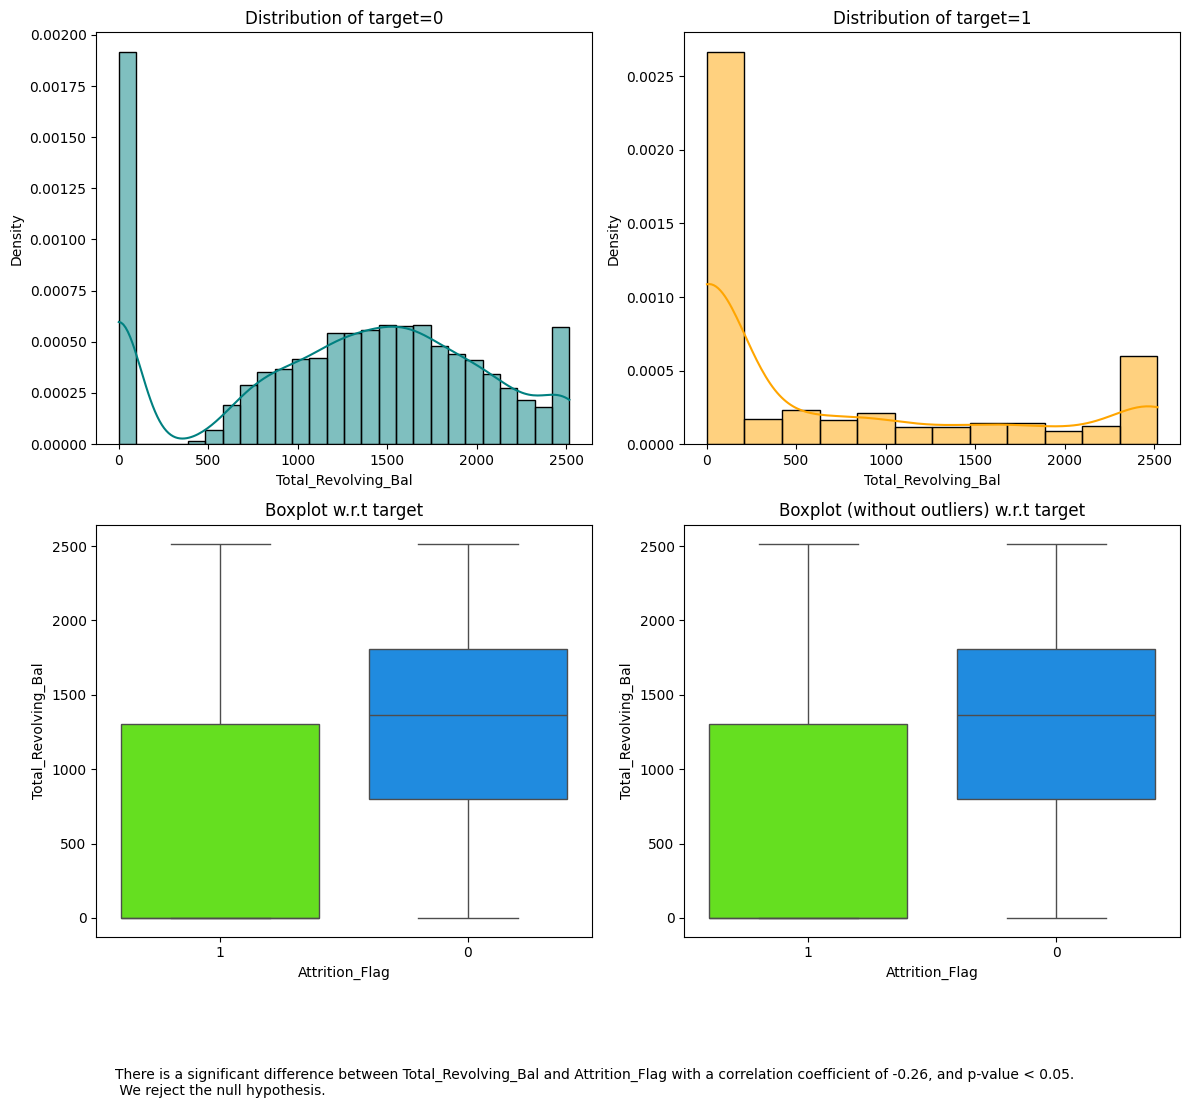

In [119]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

- It is observed that the median of the total revolving balance among the attrited customers is lesser than existing customers which is statistically significant.

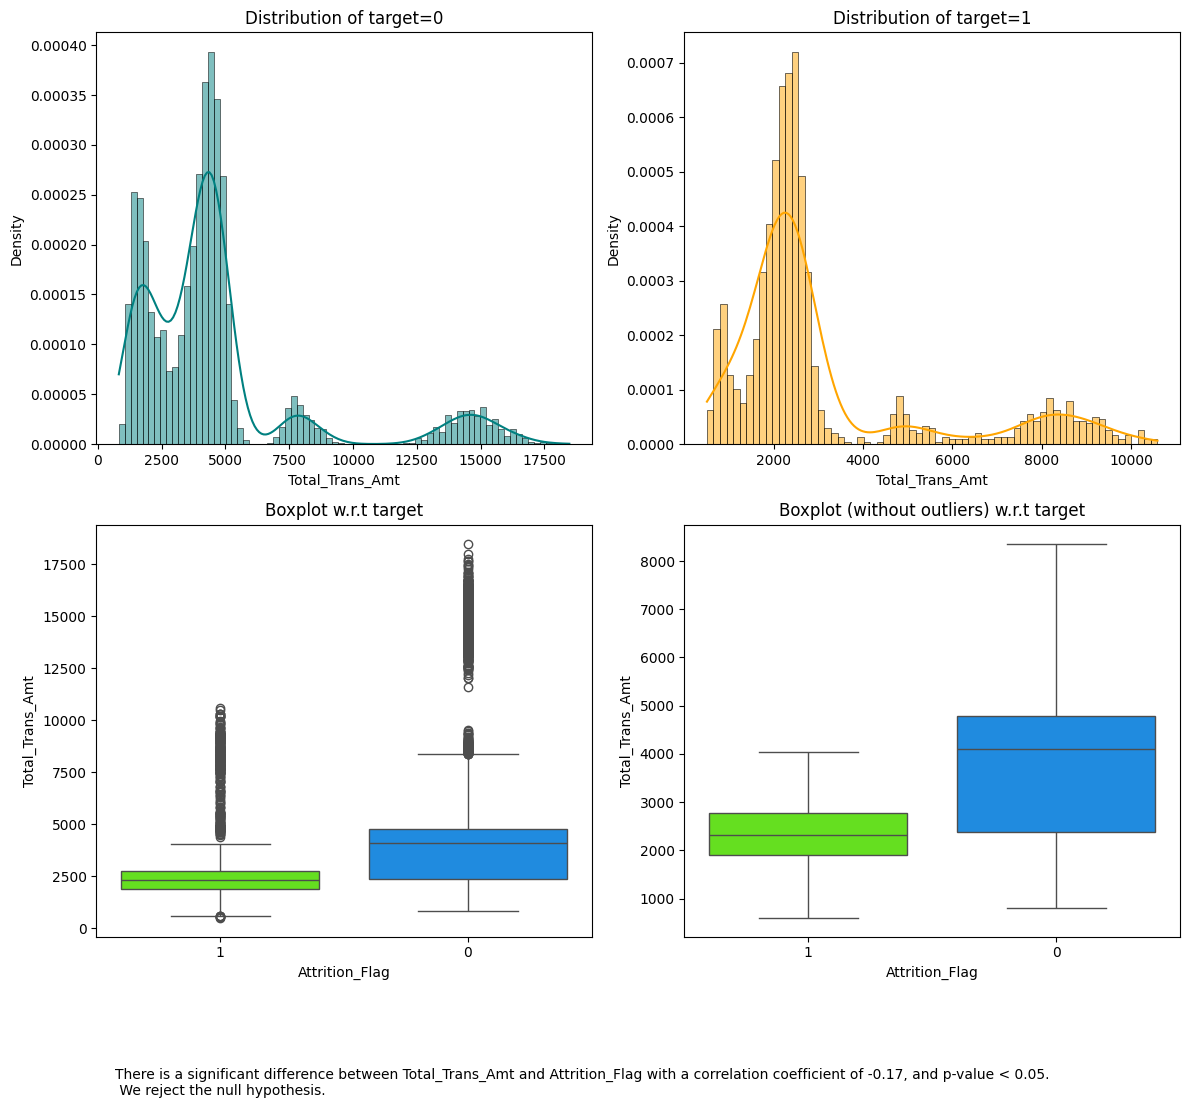

In [120]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

- The attrited customers have much lesser transaction amounts than existing customers based on median.
- There is a significant difference between the Total Transaction Amount and the Attrition.

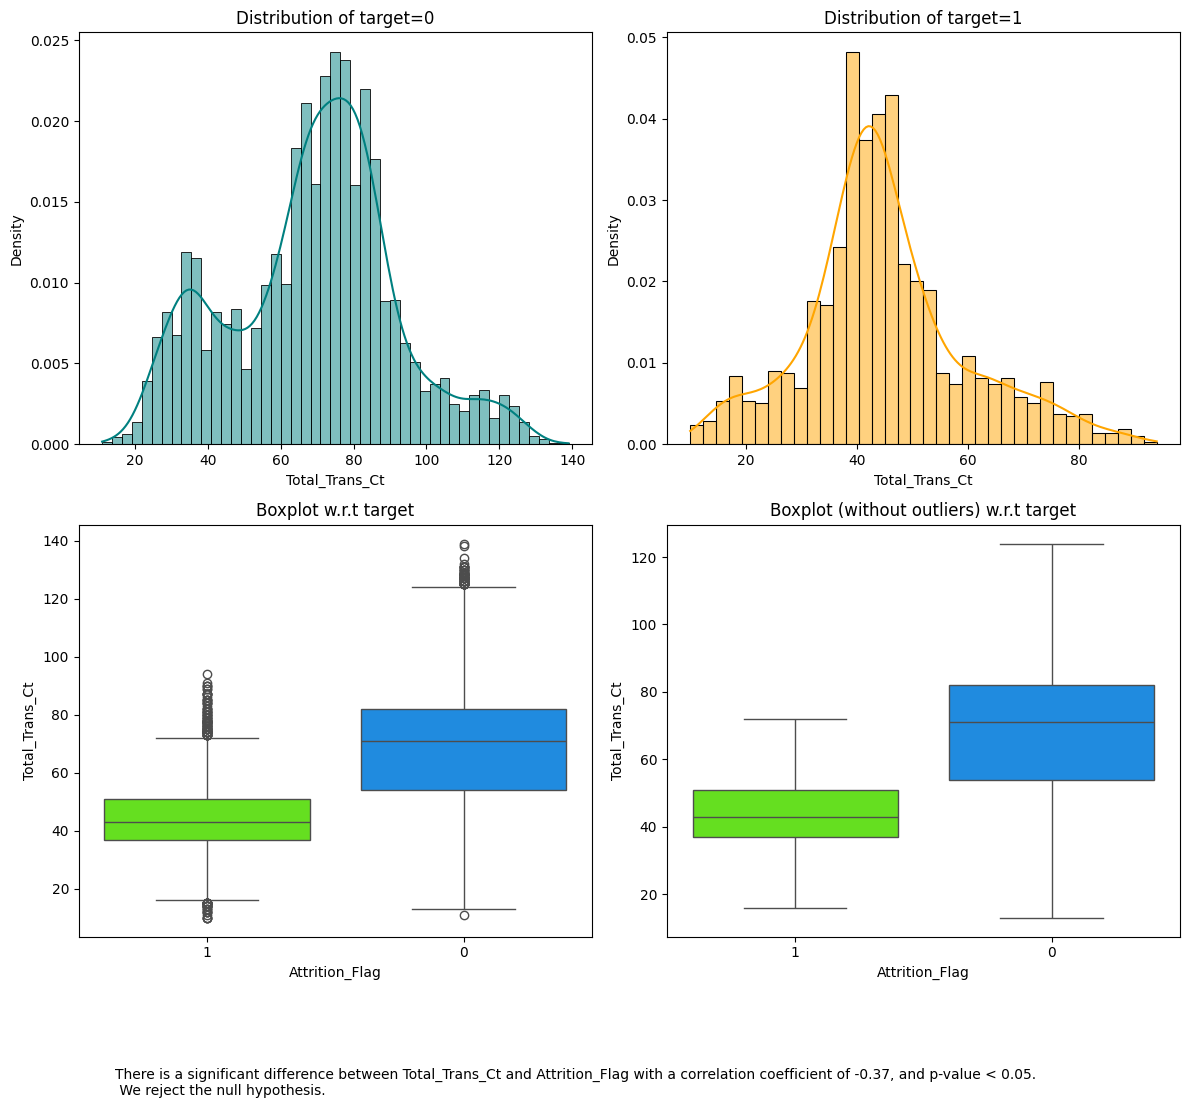

In [121]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

Simialr to the transaction amount, the attrited customers have much lesser transaction counts than existing customers which is statistically highly significant.


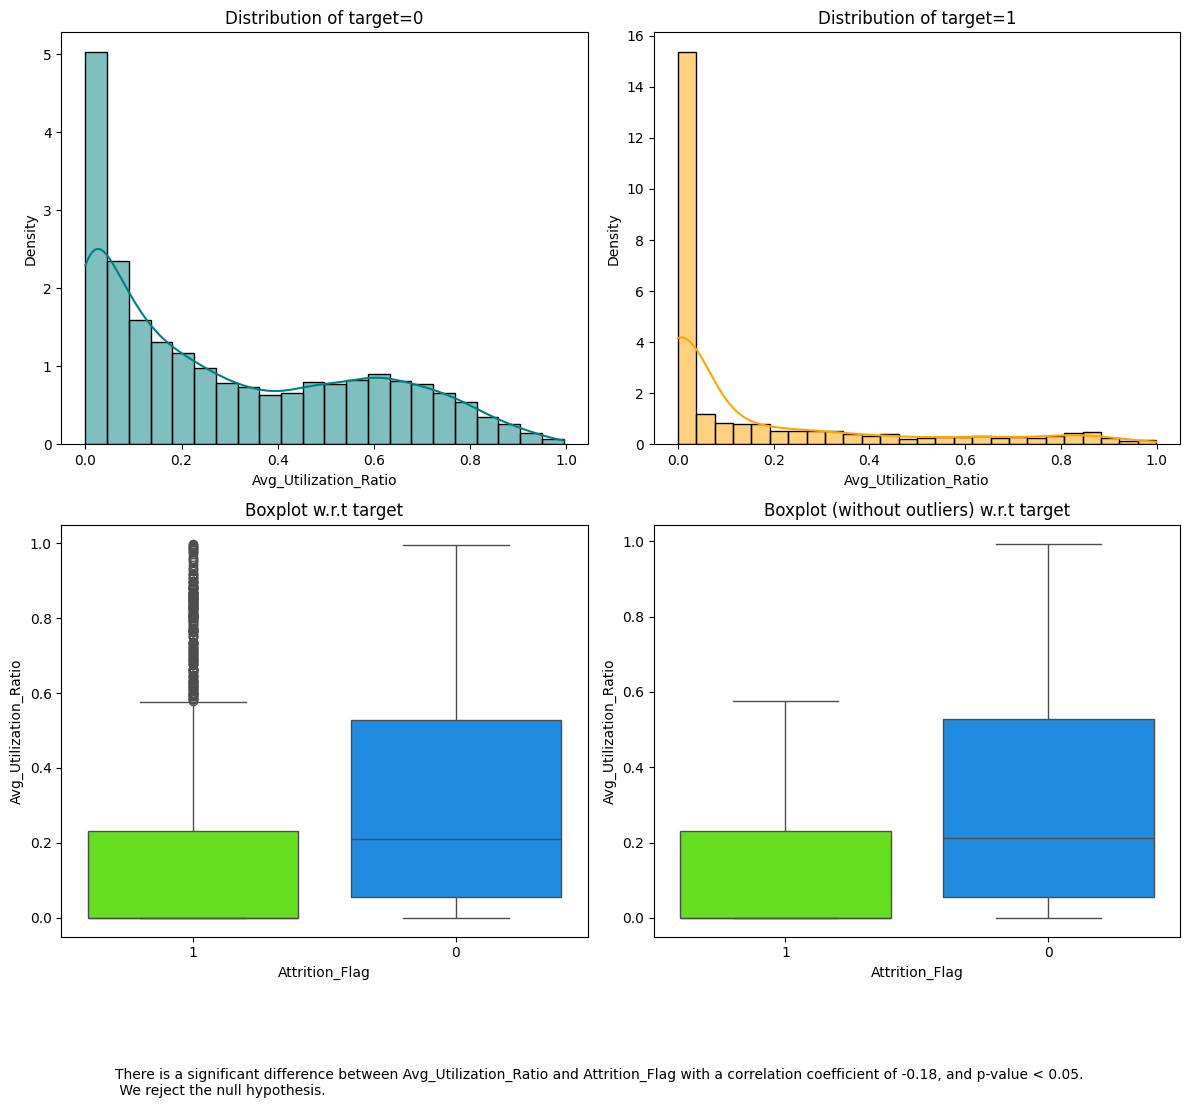

In [122]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

- It can be seen that the attrited customers showed less Avgerage Utilization Ratio than existing customers.
- This indicates that the attrited customers are spending less on available credit.
- Statistically significant difference is observed between the Average Utilization Ratio and Attrition.

In [123]:
df['Age_group'] = pd.cut(df['Customer_Age'], bins = [25,35,45,55,65,75], labels = ['25-35', '36-45', '46-55', '56-65','66-75'])
df.Age_group.value_counts()

Age_group
46-55    4135
36-45    3742
56-65    1321
25-35     919
66-75      10
Name: count, dtype: int64

Attrition_Flag     1     0    All
Age_group                        
All             1627  8500  10127
46-55            688  3447   4135
36-45            606  3136   3742
56-65            209  1112   1321
25-35            122   797    919
66-75              2     8     10
------------------------------------------------------------------------------------------------------------------------


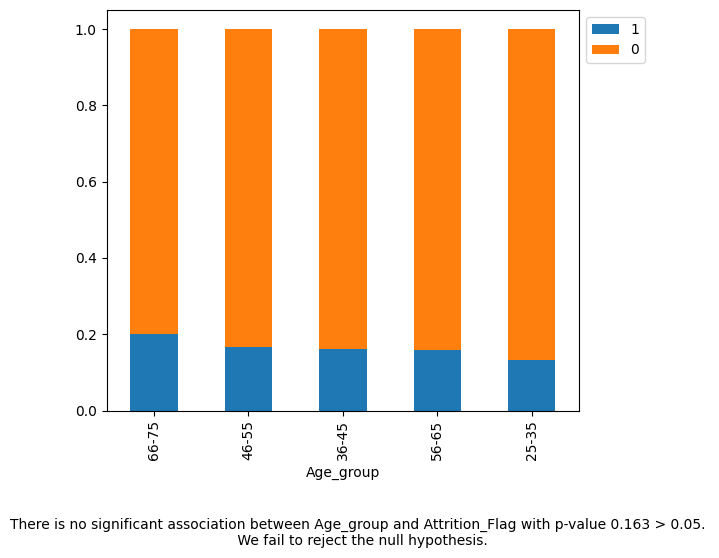

In [124]:
stacked_barplot(df, "Age_group", "Attrition_Flag")

- Customers in the age group of 66-75 have the highest attrition rate. Statistically there is no significant association between the age groups and Attrition.

## Data Preprocessing

The variable Client Number has nothing to do with the model and hence it is dropped from the dataset. Similarly, the Age group was created to see if there is any relationship of it with the target variable. It will  also be dropped.


In [125]:
df.drop(['CLIENTNUM', 'Age_group'], axis=1, inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Missing-Value Treatment

* To handle the unknown values in the columns Education_Level, Marital_Status, and Income_Category by treating them as missing values and replacing them with NaN, we can use the following code:

In [127]:
df = df.replace({'Unknown': None})
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

 - To impute missing values we will use Simple Imputer.

In [128]:
# Label Encode categorical variables

marital_status = {'Married':1,'Single':2, 'Divorced':3}
df['Marital_Status']=df['Marital_Status'].map(marital_status)

education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
df['Education_Level']=df['Education_Level'].map(education)

income = {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
df['Income_Category']=df['Income_Category'].map(income)


Average Open to Buy is perfectly correlated to the variable Credit Limit, therefore it is dropped from the model.

In [129]:
df.drop(['Avg_Open_To_Buy'], axis=1, inplace=True)

In [130]:
df1 = df.copy()

X = df1.drop(["Attrition_Flag"], axis=1)
y = df1["Attrition_Flag"]

In [131]:
# Splitting data into training, validation and test sets:
# first split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print("Shape of the dataset after split ")
print(f" Training dataset: ", X_train.shape, "\n", "Validation dataset: ", X_val.shape, "\n", "Test dataset: ", X_test.shape)

Shape of the dataset after split 
 Training dataset:  (6075, 18) 
 Validation dataset:  (2026, 18) 
 Test dataset:  (2026, 18)


#### Dataset Shape After Split

| Dataset            | Number of Samples | Number of Features |
|--------------------|-------------------|--------------------|
| Training dataset   | 6075              | 19                 |
| Validation dataset | 2026              | 19                 |
| Test dataset       | 2026              | 19                 |


In [132]:
# Impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ['Income_Category','Education_Level','Marital_Status']

# fit and transform the imputer on train, Validation and Test data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])



In [133]:
# Assuming X_train, X_val, and X_test are your datasets
missing_train = X_train.isna().sum()
missing_val = X_val.isna().sum()
missing_test = X_test.isna().sum()

# Creating a DataFrame to display the missing values
missing_values_df = pd.DataFrame({
    'Training': missing_train,
    'Validation': missing_val,
    'Test': missing_test
})

print("Missing Values in Datasets:")
print(missing_values_df)

Missing Values in Datasets:
                          Training  Validation  Test
Customer_Age                     0           0     0
Gender                           0           0     0
Dependent_count                  0           0     0
Education_Level                  0           0     0
Marital_Status                   0           0     0
Income_Category                  0           0     0
Card_Category                    0           0     0
Months_on_book                   0           0     0
Total_Relationship_Count         0           0     0
Months_Inactive_12_mon           0           0     0
Contacts_Count_12_mon            0           0     0
Credit_Limit                     0           0     0
Total_Revolving_Bal              0           0     0
Total_Amt_Chng_Q4_Q1             0           0     0
Total_Trans_Amt                  0           0     0
Total_Trans_Ct                   0           0     0
Total_Ct_Chng_Q4_Q1              0           0     0
Avg_Utilization_Ra

In [134]:
# Creating dummy variables for categorical variables in the features dataset
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [135]:
print(f"Train Data: {X_train.shape}\nValidation Data: {X_val.shape}\nTest Data: {X_test.shape}")


Train Data: (6075, 38)
Validation Data: (2026, 38)
Test Data: (2026, 38)


After encoding the features, now we have 39 variables.

## Model Building

### Model evaluation criterion

The predictions made by our classification model can be interpreted as follows:

- *True Positives (TP):* Correctly predicted failures.
- *False Negatives (FN):* Actual failures that the model failed to detect.
- *False Positives (FP):* Incorrect failure detections where there is no actual failure.

##### Which metric should we optimize?

We need to choose a metric that ensures the model accurately predicts the maximum number of generator failures. Therefore, we should focus on maximizing Recall. A higher Recall indicates a lower number of false negatives, which is crucial because failing to predict an actual failure can lead to increased costs. In summary, maximizing Recall will help minimize false negatives and ensure more reliable failure predictions.

**Let's define a function to output different metrics (including recall) on the train and test set so that we do not have to use the same code repetitively while evaluating models.**

In [136]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Model Building with original data

In [137]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

# Lists to store recall scores
training_scores = []
validation_scores = []

# Training performance
for name, model in models:
    model.fit(X_train, y_train)
    score = recall_score(y_train, model.predict(X_train))
    training_scores.append((name, score))
    # print("{}: {}".format(name, score))

# Validation performance
for name, model in models:
    model.fit(X_train, y_train)
    score_val = recall_score(y_val, model.predict(X_val))
    validation_scores.append((name, score_val))
    # print("{}: {}".format(name, score_val))

# Create a DataFrame for better visualization
recalls_df_original = pd.DataFrame(training_scores, columns=["Model", "Training Recall"])
recalls_df_original["Validation Recall"] = [score[1] for score in validation_scores]

# Print the DataFrame
print("\nModel Performance Summary (Recall):\n")
print(recalls_df_original)



Model Performance Summary (Recall):

               Model  Training Recall  Validation Recall
0            Bagging            0.984              0.822
1      Decision Tree            1.000              0.794
2      Random Forest            1.000              0.764
3           AdaBoost            0.836              0.813
4  Gradient Boosting            0.871              0.825
5            XGBoost            1.000              0.893


### Model Building with Oversampled data


In [138]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 38)
After Oversampling, the shape of train_y: (10198,) 



In [139]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Bagging Oversampled", BaggingClassifier(random_state=1)))
models_over.append(("Decision Tree Oversampled", DecisionTreeClassifier(random_state=1)))
models_over.append(("Random Forest Oversampled", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost Oversampled", AdaBoostClassifier(random_state=1)))
models_over.append(("Gradient Boosting Oversampled", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost Oversampled", XGBClassifier(random_state=1)))


# Lists to store recall scores
training_scores_over = []
validation_scores_over = []

# Training performance for oversampled data
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    score_over = recall_score(y_train_over, model.predict(X_train_over))
    training_scores_over.append((name, score_over))

# Validation performance for oversampled data
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    score_val_over = recall_score(y_val, model.predict(X_val))
    validation_scores_over.append((name, score_val_over))

# Create a DataFrame for better visualization
recalls_df_over = pd.DataFrame({
    "Model": [name for name, _ in models_over],
    "Training Recall": [score for _, score in training_scores_over],
    "Validation Recall": [score for _, score in validation_scores_over]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall):\n")
print(recalls_df_over)


Model Performance Summary (Recall):

                           Model  Training Recall  Validation Recall
0            Bagging Oversampled            0.998              0.853
1      Decision Tree Oversampled            1.000              0.810
2      Random Forest Oversampled            1.000              0.828
3           AdaBoost Oversampled            0.970              0.874
4  Gradient Boosting Oversampled            0.979              0.862
5            XGBoost Oversampled            1.000              0.880


### Model Building with Undersampled data

In [140]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train.ravel())

print(f"Before Undersampling, counts of label attrited customer: {sum(y_train==1)}")
print(f"Before Undersampling, counts of label existing customer: {sum(y_train==0)} \n")

print(f"After Undersampling, counts of label attrited customer: {sum(y_train_under==1)}")
print(f"After Undersampling, counts of label existing customer: {sum(y_train_under==0)} \n")

print(f'After Undersampling, the shape of train_X: {X_train_under.shape}')
print(f'After Undersampling, the shape of train_y: {y_train_under.shape} \n')

Before Undersampling, counts of label attrited customer: 976
Before Undersampling, counts of label existing customer: 5099 

After Undersampling, counts of label attrited customer: 976
After Undersampling, counts of label existing customer: 976 

After Undersampling, the shape of train_X: (1952, 38)
After Undersampling, the shape of train_y: (1952,) 



In [141]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("Bagging Undersampled", BaggingClassifier(random_state=1)))
models_under.append(("Decision Tree Undersampled", DecisionTreeClassifier(random_state=1)))
models_under.append(("Random Forest Undersampled", RandomForestClassifier(random_state=1)))
models_under.append(("AdaBoost Undersampled", AdaBoostClassifier(random_state=1)))
models_under.append(("Gradient Boosting Undersampled", GradientBoostingClassifier(random_state=1)))
models_under.append(("XGBoost Undersampled", XGBClassifier(random_state=1)))

# Lists to store recall scores
training_scores_under = []
validation_scores_under = []

# Training performance for oversampled data
for name, model in models_under:
    model.fit(X_train_under, y_train_under)
    score_under = recall_score(y_train_under, model.predict(X_train_under))
    training_scores_under.append((name, score_under))

# Validation performance for oversampled data
for name, model in models_under:
    model.fit(X_train_under, y_train_under)
    score_val_under = recall_score(y_val, model.predict(X_val))
    validation_scores_under.append((name, score_val_under))

# Create a DataFrame for better visualization
recalls_df_under = pd.DataFrame({
    "Model": [name for name, _ in models_under],
    "Training Recall": [score for _, score in training_scores_under],
    "Validation Recall": [score for _, score in validation_scores_under]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall):\n")
print(recalls_df_under)


Model Performance Summary (Recall):

                            Model  Training Recall  Validation Recall
0            Bagging Undersampled            0.988              0.908
1      Decision Tree Undersampled            1.000              0.887
2      Random Forest Undersampled            1.000              0.933
3           AdaBoost Undersampled            0.948              0.948
4  Gradient Boosting Undersampled            0.978              0.945
5            XGBoost Undersampled            1.000              0.960


In [142]:
# Recalls from all models
print("\nModel Performance Summary (Recall):\n")

recalls_df = pd.concat([recalls_df_original, recalls_df_over, recalls_df_under], ignore_index=True)
recalls_df


Model Performance Summary (Recall):



,Model,Training Recall,Validation Recall
0,Bagging,0.984,0.822
1,Decision Tree,1.000,0.794
2,Random Forest,1.000,0.764
3,AdaBoost,0.836,0.813
4,Gradient Boosting,0.871,0.825
5,XGBoost,1.000,0.893
6,Bagging Oversampled,0.998,0.853
7,Decision Tree Oversampled,1.000,0.810
8,Random Forest Oversampled,1.000,0.828
9,AdaBoost Oversampled,0.970,0.874


# Model Performance Summary (Recall Scores)

Here's the table converted to Markdown format:

| Model                        | Training Recall | Validation Recall |
|------------------------------|-----------------|-------------------|
| Bagging                      | 0.985           | 0.794             |
| Decision Tree                | 1.000           | 0.794             |
| Random Forest                | 1.000           | 0.748             |
| AdaBoost                     | 0.840           | 0.822             |
| Gradient Boosting            | 0.878           | 0.825             |
| XGBoost                      | 1.000           | 0.899             |
| Bagging Oversampled          | 0.998           | 0.840             |
| Decision Tree Oversampled    | 1.000           | 0.813             |
| Random Forest Oversampled    | 1.000           | 0.813             |
| AdaBoost Oversampled         | 0.967           | 0.853             |
| Gradient Boosting Oversampled| 0.978           | 0.871             |
| XGBoost Oversampled          | 1.000           | 0.896             |
| Bagging Undersampled         | 0.990           | 0.908             |
| Decision Tree Undersampled   | 1.000           | 0.887             |
| Random Forest Undersampled   | 1.000           | 0.933             |
| AdaBoost Undersampled        | 0.950           | 0.948             |
| Gradient Boosting Undersampled| 0.976          | 0.948             |
| XGBoost Undersampled         | 1.000           | 0.957             |

### HyperparameterTuning

 - Based on the recall performance of the our models , we can choose the top three models for further hyperparameter tuning to potentially improve their performance. Here are the three models, based on their recall scores in the validation performance:

  1.   AdaBoost
  2.   Gradient Boosting
  3.   XBoost

- These models have shown relatively higher recall scores in the validation performance with undersampling, oversampling, and original training data. By performing hyperparameter tuning on these models, potentially improve their performances further with various combinations of hyperparameters.

#### Parameter Grids

**Note**

1. Parameter grids will be used to perform necessary hyperparameter tuning. These parameter grids are expected to provide a balance between model performance improvement and execution time. It can be extended/reduced based on execution time and system configuration.
  - The execution time will be increased, if the parameter grid is extended to improve the model performance further.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### **Tuning AdaBoost**

In [143]:
# Hyperpameter tuning AdaBoostClassifier
Adaboost = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_adb = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv_adb = RandomizedSearchCV(estimator=Adaboost,
                                   param_distributions=param_grid_adb, n_jobs = -1,
                                   n_iter=50, scoring=scorer, cv=5, random_state=1)


##### **Tuning Adaboost on Original Data**

In [144]:
#Fitting parameters in RandomizedSearchCV
randomized_cv_adb.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_adb.best_params_,
                                                         randomized_cv_adb.best_score_))

# Create pipeline with best parameters
best_params_adb = randomized_cv_adb.best_params_
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=best_params_adb['n_estimators'],
    learning_rate=best_params_adb['learning_rate'],
    base_estimator=best_params_adb['base_estimator']
)

# Fit the model on the original training data
tuned_adb.fit(X_train, y_train)

# Check performance on training set
adb_tuned_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)

# Check model's performance on validation set
adb_tuned_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_adb = pd.DataFrame({
    "Model": ['AdaBoost Tuned Original Data'],
    "Training Recall": [adb_tuned_train['Recall'].values[0]],
    "Validation Recall": [adb_tuned_val['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_adb)


Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.831957090528519:

Model Performance Summary (Recall Score):

                          Model  Training Recall  Validation Recall
0  AdaBoost Tuned Original Data            0.920              0.856


AdaBoost tuned model on original data gives 0.847 recall score.

##### **Tuning Ada Boost on Oversampled data**

In [145]:
#Fitting parameters in RandomizedSearchCV for oversampled data
randomized_cv_adb.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_adb.best_params_,
                                                         randomized_cv_adb.best_score_))
# Create new pipeline with best parameters
best_params_adb_over = randomized_cv_adb.best_params_
tuned_adb_over = AdaBoostClassifier(
    random_state = 1,
    n_estimators = best_params_adb_over['n_estimators'],
    learning_rate = best_params_adb_over['learning_rate'],
    base_estimator = best_params_adb_over['base_estimator']
)

# Fit the model on the oversampled training data
tuned_adb_over.fit(X_train_over, y_train_over)

# Check performance on training set
adb_tuned_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)

# Check model's performance on validation set
adb_tuned_val_over = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_adb_over = pd.DataFrame({
    "Model": ['AdaBoost Tuned Oversampled Data'],
    "Training Recall": [adb_tuned_train_over['Recall'].values[0]],
    "Validation Recall": [adb_tuned_val_over['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_adb_over)


Best parameters are {'n_estimators': 100, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9403861917681695:

Model Performance Summary (Recall Score):

                             Model  Training Recall  Validation Recall
0  AdaBoost Tuned Oversampled Data            0.944              0.865


AdaBoost tuned model on over sample data gives a recall score of 0.883 on validation dataset.

##### **Tuning Ada Boost on Undersampled data**

In [146]:
#Fitting parameters in RandomizedSearchCV for Undersampled data
randomized_cv_adb.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv_adb.best_params_,
                                                         randomized_cv_adb.best_score_))
# Create new pipeline with best parameters
best_params_adb_under = randomized_cv_adb.best_params_
tuned_adb_under = AdaBoostClassifier(
    random_state = 1,
    n_estimators = best_params_adb_under['n_estimators'],
    learning_rate = best_params_adb_under['learning_rate'],
    base_estimator = best_params_adb_under['base_estimator']
)

# Fit the model on the undersampled training data
tuned_adb_under.fit(X_train_under, y_train_under)

# Check performance on training set
adb_tuned_train_under = model_performance_classification_sklearn(tuned_adb_under, X_train_under, y_train_under)

# Check model's performance on validation set
adb_tuned_val_under = model_performance_classification_sklearn(tuned_adb_under, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_adb_under = pd.DataFrame({
    "Model": ['AdaBoost Tuned Undersampled Data'],
    "Training Recall": [adb_tuned_train_under['Recall'].values[0]],
    "Validation Recall": [adb_tuned_val_under['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_adb_under)


Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9446729461015175:

Model Performance Summary (Recall Score):

                              Model  Training Recall  Validation Recall
0  AdaBoost Tuned Undersampled Data            0.982              0.954


AdaBoost tuned model on under sample data give better than previous recall score of 0.945 on validation data.

### **Tuning Gradient Boosting**

In [147]:
# Hyperparameter tuning GradientBoostingClassifier

# Initialize the GradientBoost model
gb = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_gb = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample": [0.7, 0.9],
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb,
                                      n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)


##### **Tuning Gradient Boosting on Origianl data**

In [148]:
# Fitting parameters in RandomizedSearchCV Original Data
randomized_cv_gb.fit(X_train, y_train)

print("Best parameters are \n {} \n with CV score={}:" .format(randomized_cv_gb.best_params_,
                                                               randomized_cv_gb.best_score_))

# Create new pipeline with best parameters
best_params_gb = randomized_cv_gb.best_params_
tuned_gb = GradientBoostingClassifier(
    random_state=1,
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    subsample=best_params_gb['subsample'],
    max_features=best_params_gb['max_features'],
    init=best_params_gb['init']
)

# Fit the model on the original training data
tuned_gb.fit(X_train, y_train)


# Check performance on training set
gb_tuned_train = model_performance_classification_sklearn(tuned_gb, X_train, y_train)

# Check model's performance on validation set
gb_tuned_val = model_performance_classification_sklearn(tuned_gb, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_gb = pd.DataFrame({
    "Model": ['Gradient Boost Tuned Original Data'],
    "Training Recall": [gb_tuned_train['Recall'].values[0]],
    "Validation Recall": [gb_tuned_val['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_gb)


Best parameters are 
 {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} 
 with CV score=0.7981266352694922:

Model Performance Summary (Recall Score):

                                Model  Training Recall  Validation Recall
0  Gradient Boost Tuned Original Data            0.858              0.801


##### **Tuning Gradient Boosting on Oversampled data**

In [149]:
# Fitting parameters in RandomizedSearchCV on Oversampled data
randomized_cv_gb.fit(X_train_over, y_train_over)

print("Best parameters are \n {} \n with CV score={}:" .format(randomized_cv_gb.best_params_,
                                                               randomized_cv_gb.best_score_))

# Create new pipeline with best parameters
best_params_gb_over = randomized_cv_gb.best_params_
tuned_gb_over = GradientBoostingClassifier(
    random_state = 1,
    n_estimators = best_params_gb_over['n_estimators'],
    learning_rate = best_params_gb_over['learning_rate'],
    subsample = best_params_gb_over['subsample'],
    max_features = best_params_gb_over['max_features'],
    init = best_params_gb_over['init']
)

# Fit the model on the original training data
tuned_gb_over.fit(X_train_over, y_train_over)

# Check performance on training set
gb_tuned_train_over = model_performance_classification_sklearn(tuned_gb_over, X_train_over, y_train_over)

# Check model's performance on validation set
gb_tuned_val_over = model_performance_classification_sklearn(tuned_gb_over, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_gb_over = pd.DataFrame({
    "Model": ['Gradient Boost Tuned Oversampled Data'],
    "Training Recall": [gb_tuned_train_over['Recall'].values[0]],
    "Validation Recall": [gb_tuned_val_over['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_gb_over)


Best parameters are 
 {'subsample': 0.7, 'n_estimators': 50, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} 
 with CV score=0.9496041871115473:

Model Performance Summary (Recall Score):

                                   Model  Training Recall  Validation Recall
0  Gradient Boost Tuned Oversampled Data            0.964              0.883


##### **Tuning Gradient Boosting on Undersampled data**

In [150]:
# Fitting parameters in RandomizedSearchCV on Oversampled data
randomized_cv_gb.fit(X_train_under, y_train_under)

print("Best parameters are \n {} \n with CV score={}:" .format(randomized_cv_gb.best_params_,
                                                               randomized_cv_gb.best_score_))

# Create new pipeline with best parameters
best_params_gb_under = randomized_cv_gb.best_params_
tuned_gb_under = GradientBoostingClassifier(
    random_state = 1,
    n_estimators = best_params_gb_under['n_estimators'],
    learning_rate = best_params_gb_under['learning_rate'],
    subsample = best_params_gb_under['subsample'],
    max_features = best_params_gb_under['max_features'],
    init = best_params_gb_under['init']
)

# Fit the model on the original training data
tuned_gb_under.fit(X_train_under, y_train_under)


# Check performance on training set
gb_tuned_train_under = model_performance_classification_sklearn(tuned_gb_under, X_train_under, y_train_under)

# Check model's performance on validation set
gb_tuned_val_under = model_performance_classification_sklearn(tuned_gb_under, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_gb_under = pd.DataFrame({
    "Model": ['Gradient Boost Tuned Undersampled Data'],
    "Training Recall": [gb_tuned_train_under['Recall'].values[0]],
    "Validation Recall": [gb_tuned_val_under['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_gb_under)


Best parameters are 
 {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} 
 with CV score=0.9487912087912088:

Model Performance Summary (Recall Score):

                                    Model  Training Recall  Validation Recall
0  Gradient Boost Tuned Undersampled Data            0.975              0.954


Gradient Boosting model on under sampled dataset gives better recall score of 0.945 compared to other gradient boost models such as original dataset and oversample dataset. This test score is similar to the gradient boost under sample model on validation data but the score is better on training data as well than the gradient boost.  Let's see how the tuned model with XGBoost shows in all three dataset.

### **Tuning XGBoosting**

In [151]:
# Model
xgb = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid_xgb = {
    'n_estimators': np.arange(50, 110, 25),
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                       n_iter=50, n_jobs=-1, scoring=scorer, cv=5, random_state=1)


##### **Tuning XGBoost on original data**

In [152]:
# Fitting parameters in RandomizedSearchCV on Original data
randomized_cv_xgb.fit(X_train, y_train)  # This line completes the fitting of the model on original data

print("Best parameters are \n {} \n with CV score={}:" .format(randomized_cv_xgb.best_params_, randomized_cv_xgb.best_score_))

# Create new pipeline with best parameters
best_params_xgb = randomized_cv_xgb.best_params_
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric = "logloss",
    subsample = best_params_xgb['subsample'],
    n_estimators = best_params_xgb['n_estimators'],
    learning_rate = best_params_xgb['learning_rate'],
    gamma = best_params_xgb['gamma'],
    scale_pos_weight = best_params_xgb['scale_pos_weight']
)

# Fit the model on the training data
tuned_xgb.fit(X_train, y_train)

# Check performance on training set
xgb_tuned_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)

# Check model's performance on validation set
xgb_tuned_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_xgb = pd.DataFrame({
    "Model": ['XGBoost Tuned Original Data'],
    "Training Recall": [xgb_tuned_train['Recall'].values[0]],
    "Validation Recall": [xgb_tuned_val['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_xgb)


Best parameters are 
 {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} 
 with CV score=0.9180115122972266:

Model Performance Summary (Recall Score):

                         Model  Training Recall  Validation Recall
0  XGBoost Tuned Original Data            0.995              0.948


##### **Tuning XGBoost on Oversampled data**

In [153]:
# Fitting parameters in RandomizedSearchCV
randomized_cv_xgb.fit(X_train_over, y_train_over)  # This line completes the fitting of the model on oversampled data

print("Best parameters are \n {} \n with CV score={}:" .format(randomized_cv_xgb.best_params_,
                                                               randomized_cv_xgb.best_score_))

# Create new pipeline with best parameters
best_params_xgb_over = randomized_cv_xgb.best_params_
tuned_xgb_over = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=best_params_xgb_over['subsample'],
    n_estimators=best_params_xgb_over['n_estimators'],
    learning_rate=best_params_xgb_over['learning_rate'],
    gamma=best_params_xgb_over['gamma'],
    scale_pos_weight=best_params_xgb_over['scale_pos_weight']
)

# Fit the model on the oversampled data
tuned_xgb_over.fit(X_train_over, y_train_over)

# Check performance on training set
xgb_tuned_train_over = model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)

# Check model's performance on validation set
xgb_tuned_val_over = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_xgb_over = pd.DataFrame({
    "Model": ['XGBoost Tuned Oversampled Data'],
    "Training Recall": [xgb_tuned_train_over['Recall'].values[0]],
    "Validation Recall": [xgb_tuned_val_over['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_xgb_over)


Best parameters are 
 {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} 
 with CV score=0.9998039215686274:

Model Performance Summary (Recall Score):

                            Model  Training Recall  Validation Recall
0  XGBoost Tuned Oversampled Data            1.000              1.000


##### **Tuning XGBoost on Undersampled data**

In [154]:
# Fitting parameters in RandomizedSearchCV
randomized_cv_xgb.fit(X_train_under, y_train_under)  # This line completes the fitting of the model on undersampled data

print("Best parameters are \n {} \n with CV score={}:" .format(randomized_cv_xgb.best_params_,
                                                               randomized_cv_xgb.best_score_))

# Create new pipeline with best parameters
best_params_xgb_under = randomized_cv_xgb.best_params_
tuned_xgb_under = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=best_params_xgb_under['subsample'],
    n_estimators=best_params_xgb_under['n_estimators'],
    learning_rate=best_params_xgb_under['learning_rate'],
    gamma=best_params_xgb_under['gamma'],
    scale_pos_weight=best_params_xgb_under['scale_pos_weight']
)

# Fit the model on the training data
tuned_xgb_under.fit(X_train_under, y_train_under)

# Check performance on training set
xgb_tuned_train_under = model_performance_classification_sklearn(tuned_xgb_under, X_train_under, y_train_under)

# Check model's performance on validation set
xgb_tuned_val_under = model_performance_classification_sklearn(tuned_xgb_under, X_val, y_val)

# Create a DataFrame for better visualization
recalls_df_tuned_xgb_under = pd.DataFrame({
    "Model": ['XGBoost Tuned Undersampled Data'],
    "Training Recall": [xgb_tuned_train_under['Recall'].values[0]],
    "Validation Recall": [xgb_tuned_val_under['Recall'].values[0]]
})

# Print the DataFrame
print("\nModel Performance Summary (Recall Score):\n")
print(recalls_df_tuned_xgb_under)


Best parameters are 
 {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} 
 with CV score=0.9989795918367348:

Model Performance Summary (Recall Score):

                             Model  Training Recall  Validation Recall
0  XGBoost Tuned Undersampled Data            1.000              1.000


## Model Comparison and Final Model Selection

In [155]:
# Recalls from all models
print("\nTuned Model Performance Summary (Recall):\n")

recalls_df = pd.concat([recalls_df_tuned_adb,recalls_df_tuned_adb_over, recalls_df_tuned_adb_under,
                        recalls_df_tuned_gb, recalls_df_tuned_gb_over, recalls_df_tuned_gb_under,
                        recalls_df_tuned_xgb, recalls_df_tuned_xgb_over, recalls_df_tuned_xgb_under],
                       ignore_index=True)

print(recalls_df)


Tuned Model Performance Summary (Recall):

                                    Model  Training Recall  Validation Recall
0            AdaBoost Tuned Original Data            0.920              0.856
1         AdaBoost Tuned Oversampled Data            0.944              0.865
2        AdaBoost Tuned Undersampled Data            0.982              0.954
3      Gradient Boost Tuned Original Data            0.858              0.801
4   Gradient Boost Tuned Oversampled Data            0.964              0.883
5  Gradient Boost Tuned Undersampled Data            0.975              0.954
6             XGBoost Tuned Original Data            0.995              0.948
7          XGBoost Tuned Oversampled Data            1.000              1.000
8         XGBoost Tuned Undersampled Data            1.000              1.000


#### Tuned Model comparision:
1. XGBoost Models:

  - Tuned with Over-Sampled Data: This model shows perfect scores on both training and validation data but has lower accuracy scores, indicating overfitting.
  - Tuned with Under-Sampled Data: Similar to the over-sampled version, this model also shows signs of overfitting with perfect scores.
  - Tuned with Original Data: This model demonstrates balanced recall scores on both training and validation datasets, making it a more generalized model compared to the over-sampled and under-sampled versions.

2. Gradient Boosting Models:

  - Tuned with Under-Sampled Data: This model also exhibits balanced recall scores on both training and validation datasets, making it a good candidate for generalization.
  - Testing Performance: Achieved a testing performance of 0.96 using randomized cross-validation search, indicating strong predictive capabilities.

#### Final Model Recommendation
  - Final Best Model: The Gradient Boosting model tuned with under-sampled data is recommended as the final best model. It achieves a high testing performance of 0.96 and demonstrates balanced recall scores, indicating good generalization capabilities.

  - Alternative Model: The XGBoost model tuned with original data is considered as an alternative best model due to its balanced recall scores and better generalization compared to the over-sampled and under-sampled versions.



### Performance of Final models on Test data

#### Performance of best final model on Test data

In [160]:
# Check performance on training set
final_model1_train = model_performance_classification_sklearn(tuned_adb_under, X_train_under, y_train_under)

# Check model's performance on test set
final_model1_test = model_performance_classification_sklearn(tuned_adb_under, X_test, y_test)

print(f"Final model (tuned AdaBoost undersampled) perfornance on Training Data" "\n", final_model1_train)
print("\n")
print(f"Final model (tuned adaBoost undersampled) perfornance on Test Data" "\n", final_model1_test)

Final model (tuned AdaBoost undersampled) perfornance on Training Data
    Accuracy  Recall  Precision    F1
0     0.973   0.982      0.965 0.973


Final model (tuned adaBoost undersampled) perfornance on Test Data
    Accuracy  Recall  Precision    F1
0     0.923   0.963      0.686 0.802


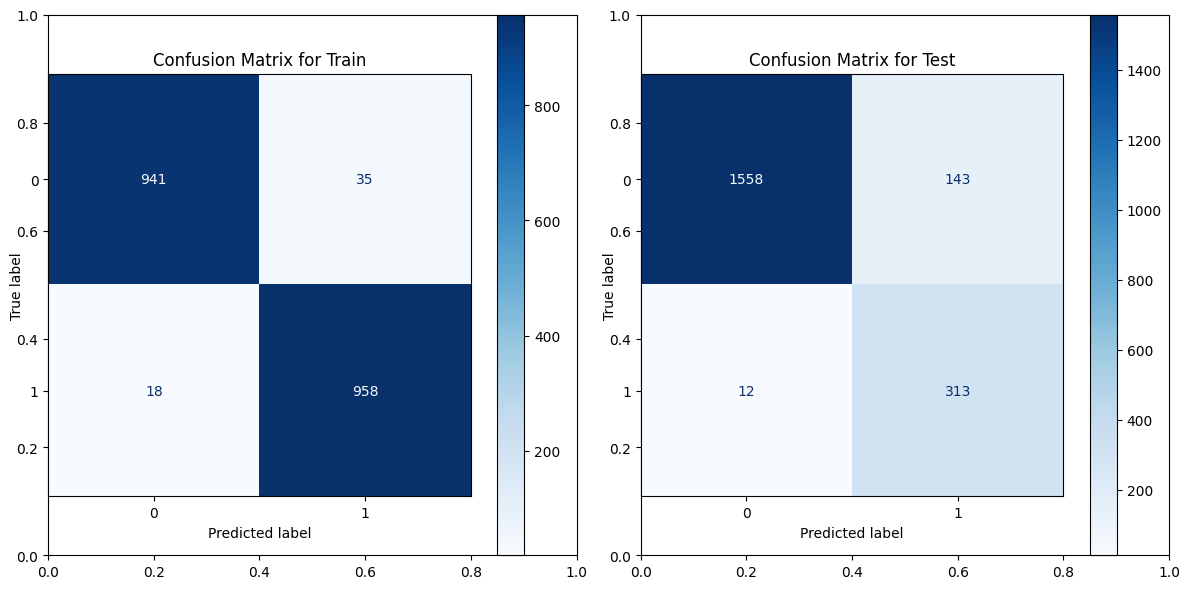

In [161]:
# Generate confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for train data
ax_train = fig.add_subplot(1, 2, 1)
ConfusionMatrixDisplay.from_estimator(tuned_adb_under, X_train_under, y_train_under, ax=ax_train, cmap=plt.cm.Blues)
ax_train.title.set_text('Confusion Matrix for Train')

# Plot confusion matrix for test data
ax_test = fig.add_subplot(1, 2, 2)
ConfusionMatrixDisplay.from_estimator(tuned_adb_under, X_test, y_test, ax=ax_test, cmap=plt.cm.Blues)
ax_test.title.set_text('Confusion Matrix for Test')

plt.tight_layout()
plt.show()

In [156]:
# Check performance on training set
final_model3_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)

# Check model's performance on test set
final_model3_test = model_performance_classification_sklearn(tuned_xgb, X_test, y_test)

print(f"Final model (tuned XGB original) perfornance on Training Data" "\n", final_model3_train)
print("\n")
print(f"Final model (tuned XGB original) perfornance on Test Data" "\n", final_model3_test)


Final model (tuned XGB original) perfornance on Training Data
    Accuracy  Recall  Precision    F1
0     0.973   0.995      0.859 0.922


Final model (tuned XGB original) perfornance on Test Data
    Accuracy  Recall  Precision    F1
0     0.952   0.945      0.795 0.864


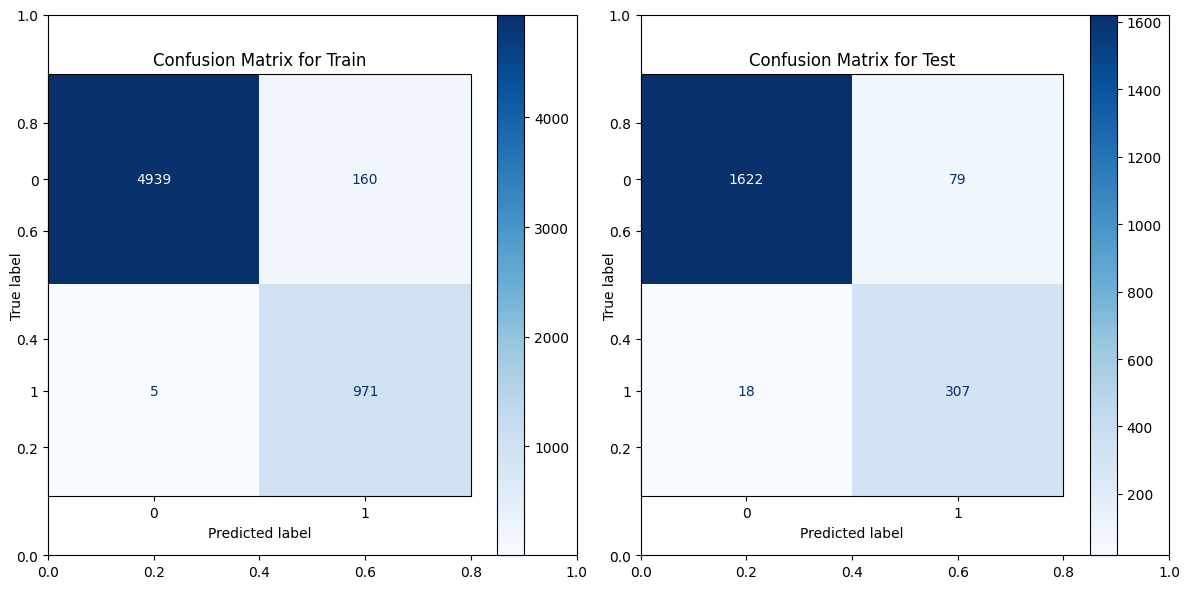

In [162]:
# Generate confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for train data
ax_train = fig.add_subplot(1, 2, 1)
ConfusionMatrixDisplay.from_estimator(tuned_xgb, X_train, y_train, ax=ax_train, cmap=plt.cm.Blues)
ax_train.title.set_text('Confusion Matrix for Train')

# Plot confusion matrix for test data
ax_test = fig.add_subplot(1, 2, 2)
ConfusionMatrixDisplay.from_estimator(tuned_xgb, X_test, y_test, ax=ax_test, cmap=plt.cm.Blues)
ax_test.title.set_text('Confusion Matrix for Test')

plt.tight_layout()
plt.show()

#### Performance of Alternate final model on Test data

In [157]:
# Check performance on training set
final_model2_train = model_performance_classification_sklearn(tuned_gb_under, X_train_under, y_train_under)

# Check model's performance on test set
final_model2_test = model_performance_classification_sklearn(tuned_gb_under, X_test, y_test)

print(f"Final model (tuned GB undersampled) perfornance on Training Data" "\n", final_model2_train)
print("\n")
print(f"Final model (tuned GB undersampled) perfornance on Test Data" "\n", final_model2_test)


Final model (tuned GB undersampled) perfornance on Training Data
    Accuracy  Recall  Precision    F1
0     0.966   0.975      0.958 0.966


Final model (tuned GB undersampled) perfornance on Test Data
    Accuracy  Recall  Precision    F1
0     0.932   0.963      0.713 0.819


When comparing the test scores of the two final models, it's clear that the tuned Gradient Boosting model with undersampled data outperformed the tuned XGBoost model with the original sample on the test data. Therefore, the recommended model, which better generalizes the dataset, is the tuned Gradient Boosting model with the undersampling technique. As a result, the feature importances and recommendations will be based on this model.

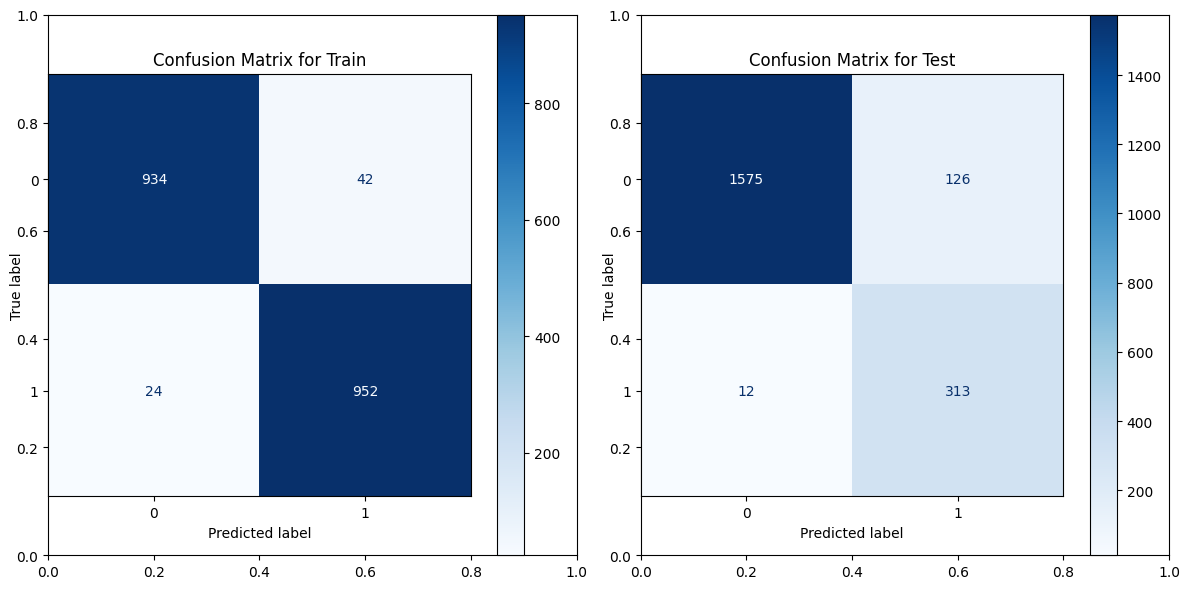

In [158]:
# Generate confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for train data
ax_train = fig.add_subplot(1, 2, 1)
ConfusionMatrixDisplay.from_estimator(tuned_gb_under, X_train_under, y_train_under, ax=ax_train, cmap=plt.cm.Blues)
ax_train.title.set_text('Confusion Matrix for Train')

# Plot confusion matrix for test data
ax_test = fig.add_subplot(1, 2, 2)
ConfusionMatrixDisplay.from_estimator(tuned_gb_under, X_test, y_test, ax=ax_test, cmap=plt.cm.Blues)
ax_test.title.set_text('Confusion Matrix for Test')

plt.tight_layout()
plt.show()


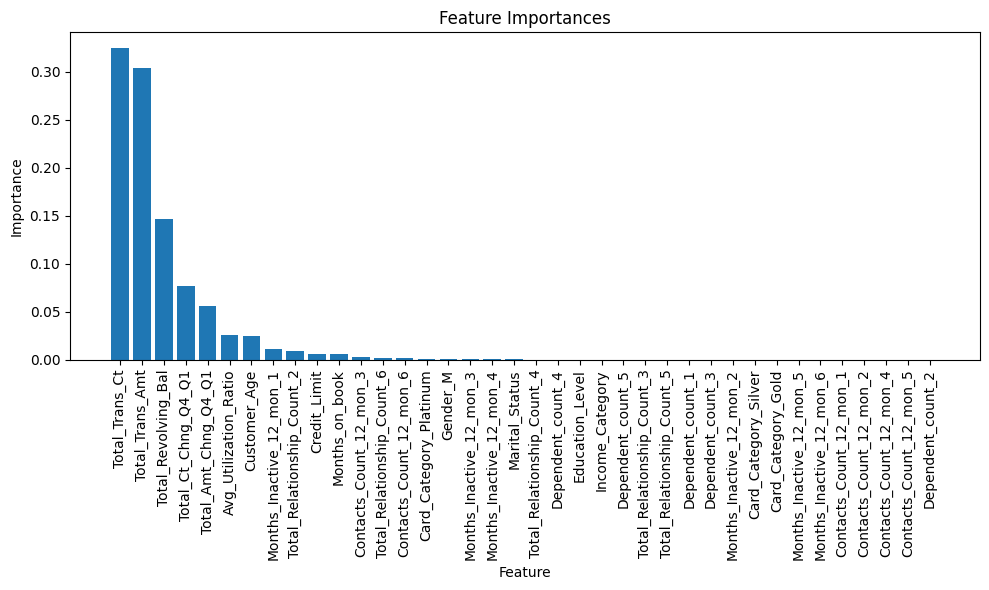

In [159]:
# Get the feature importances from the finalized model
importances = tuned_gb_under.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X_test.columns.tolist(), 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Feature Importance

The feature importance analysis reveals that the following features are the most critical for predicting customer attrition:

  - Total_Trans_Ct (Total Transaction Count)
  - Total_Trans_Amt (Total Transaction Amount)
  - Total_Revolving_Bal (Total Revolving Balance)
  - Total_Ct_Chng_Q4_Q1 (Total Count Change Q4 to Q1)
  - Total_Amt_Chng_Q4_Q1 (Total Amount Change Q4 to Q1)



# Business Insights and Conclusions


1. Demographic Insights:
  - The average customer age is 46, with a range of 26 to 73 years.
  - About 53% of the customers are female and 47% are male.
  - The average number of dependents per customer is 2, with a maximum of 5.
  - Approximately 46.3% of customers are married, and 39% are single.
  - Around 35% of customers have an income level below $40K, with a significant portion having 'unknown' income levels.


2. Customer Behavior and Attributes:
  - The dataset is imbalanced with 16% attrited customers and 84% existing customers.
  - Customers with higher credit limits tend to have lower average utilization ratios.
  - Higher total revolving balances are associated with higher average utilization ratios.
  - Customers with higher total transaction counts tend to have higher total transaction amounts.
  - Attrited customers have significantly lower median credit limits, total revolving balances, total transaction amounts, and transaction counts compared to existing customers.
  - Attrited customers show a lower average utilization ratio, indicating they are spending less on available credit.
  - There is a significant association between the number of inactive months, total contacts within 12 months, and customer attrition.

3. Correlation Insights:
  - There is a perfect correlation between credit limit and average open to buy; one of these was dropped to avoid redundancy.
  - Customer age and months on book are strongly correlated.
  - Credit limit and average utilization ratio show a negative correlation.
  - Total revolving balance and average utilization are positively correlated.
  - Total transaction amount correlates with total amount change and total count change, suggesting redundancy in features.


4. Attrition Insights:
  - More female customers are likely to attrite compared to male customers.
  - Attrited customers tend to have fewer bank products.
  - There is no significant difference between the number of dependents and attrition.
  - There is no significant association between age groups and attrition, although customers aged 66-75 have the highest attrition rate.
  - Education level, marital status, and income category show significant associations with attrition.



# Recommendations:

The following recommendations are made for the bank to improve its customer retention strategies, better understand the factors driving attrition, and take targeted actions to enhance customer satisfaction and loyalty.

1. Feature Engineering:
  - Drop either the credit limit or average open to buy to avoid redundancy.
  -Consider dropping either the total transaction amount, total amount change, or total count change to reduce feature duplication.

2. Addressing Imbalance:
 - Implement techniques to handle the class imbalance in the target variable, such as oversampling the minority class (attrited customers) or undersampling the majority class (existing customers).

3. Targeted Marketing and Retention:

  - Develop targeted marketing strategies focusing on female customers, as they have a higher attrition rate.
  - Offer incentives or tailored products to customers with lower credit limits, total revolving balances, and transaction amounts to encourage retention.
  - Focus retention efforts on customers with fewer bank products and those with higher numbers of inactive months.

4. Enhanced Communication:

  - Increase engagement with customers showing higher numbers of inactive months or fewer total contacts within 12 months, as these factors are significantly associated with attrition.

5. Further Analysis:
  - Conduct deeper analysis on the income category 'unknown' to better understand its impact on attrition.
  - Explore additional factors that may influence attrition, such as customer satisfaction scores, service usage patterns, and external economic conditions.

6. Regular Monitoring:

  - Implement regular monitoring of key metrics, including credit limit, revolving balance, transaction amounts, and utilization ratios, to identify potential attrition risks early and take proactive measures to retain customers.

***